In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

df_train = pd.read_csv("drugsComTrain_raw.csv")
df_test = pd.read_csv("drugsComTest_raw.csv") 

In [2]:
df_train.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [3]:
df_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [4]:
print ("The shape of the train set given is : ", df_train.shape)
print ("The shape of the test set given is : ", df_test.shape)

The shape of the train set given is :  (161297, 7)
The shape of the test set given is :  (53766, 7)


In [5]:
# Droping the data points with null values as it's very much less tha 5% of the whole dataset
df_train = df_train.dropna(how = 'any', axis = 0)
df_test = df_test.dropna(how = 'any', axis = 0)

In [6]:
print ("The shape of the train df :",df_train.shape)
print ("The shape of the test df :", df_test.shape)

The shape of the train df : (160398, 7)
The shape of the test df : (53471, 7)


In [7]:
# Merging the test and train data 
merge = [df_train, df_test]
df_data = pd.concat(merge)
df_data.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [8]:
df_data.shape

(213869, 7)

In [9]:
df_data.columns = df_data.columns.str.lower()

In [10]:
# Sorting the dataframe
df_data.sort_values(['uniqueid'], ascending = True, inplace = True)
df_data.reset_index(drop = True, inplace = True)

In [11]:
df_data['condition'].isnull().sum(axis = 0)

0

In [12]:
df_data.dtypes

uniqueid        int64
drugname       object
condition      object
review         object
rating          int64
date           object
usefulcount     int64
dtype: object

In [13]:
df_data.head(10)

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,28-Oct-15,4
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,27-Oct-15,11
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,27-Oct-15,7
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,26-Oct-15,12
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,25-Oct-15,4
5,6,Medroxyprogesterone,Birth Control,"""This is a horrible shot!! I got my first shot...",1,24-Oct-15,3
6,7,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 18 and got this for heavy bleeding. ...",5,22-Oct-15,6
7,8,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Im 19 and have been having heavy and painful ...",5,21-Oct-15,2
8,9,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m a 30 year old woman. I got the shot ...",2,21-Oct-15,5
9,10,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 17 years old and I got shot in Augus...",7,20-Oct-15,2


In [14]:
df_data['condition'].nunique()

916

In [15]:
df_data.loc[df_data['rating'] == 1, :]['drugname'].value_counts().head(10)

Miconazole                            767
Ethinyl estradiol / norethindrone     728
Etonogestrel                          707
Levonorgestrel                        511
Nexplanon                             504
Ethinyl estradiol / norgestimate      464
Medroxyprogesterone                   443
Depo-Provera                          417
Tioconazole                           410
Ethinyl estradiol / levonorgestrel    385
Name: drugname, dtype: int64

In [16]:
df_data.at[df_data['usefulcount'].idxmin(), 'drugname']

'Medroxyprogesterone'

In [17]:
df_data.loc[df_data['rating'] == 0, :].shape

(0, 7)

In [18]:
df_data.head(10)

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,28-Oct-15,4
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,27-Oct-15,11
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,27-Oct-15,7
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,26-Oct-15,12
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,25-Oct-15,4
5,6,Medroxyprogesterone,Birth Control,"""This is a horrible shot!! I got my first shot...",1,24-Oct-15,3
6,7,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 18 and got this for heavy bleeding. ...",5,22-Oct-15,6
7,8,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Im 19 and have been having heavy and painful ...",5,21-Oct-15,2
8,9,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m a 30 year old woman. I got the shot ...",2,21-Oct-15,5
9,10,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 17 years old and I got shot in Augus...",7,20-Oct-15,2


In [19]:
df_data.describe()

,uniqueid,rating,usefulcount
count,213869.000000,213869.000000,213869.000000
mean,116076.924786,6.991149,28.094118
std,67016.705794,3.275792,36.401377
min,0.000000,1.000000,0.000000
25%,58122.000000,5.000000,6.000000
50%,115972.000000,8.000000,16.000000
75%,174018.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [20]:
# Converting the date in to date time format
df_data['date'] = pd.to_datetime(df_data['date'])

### Exploratory Data Analysis

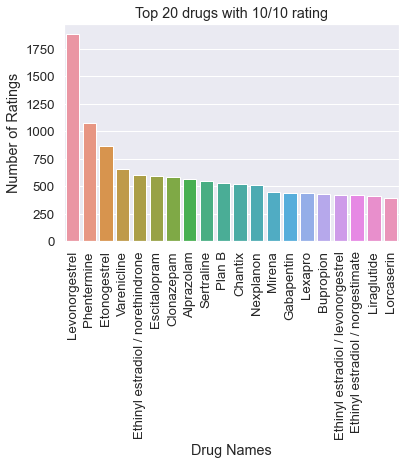

In [21]:
# This barplot shows the top 20 drugs with the 10/10 rating
import seaborn as sns

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_data.loc[df_data.rating == 10, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

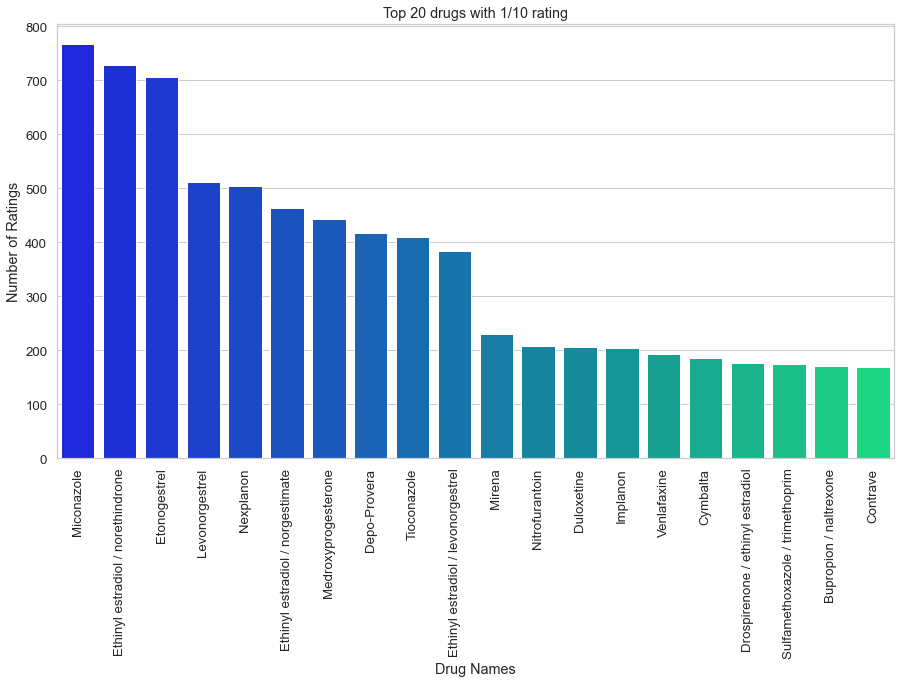

In [22]:
# This barplot shows the Top 20 drugs with the 1/10 rating
import seaborn as sns

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'whitegrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_data.loc[df_data.rating == 1, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

Text(0.5, 0, 'Rating')

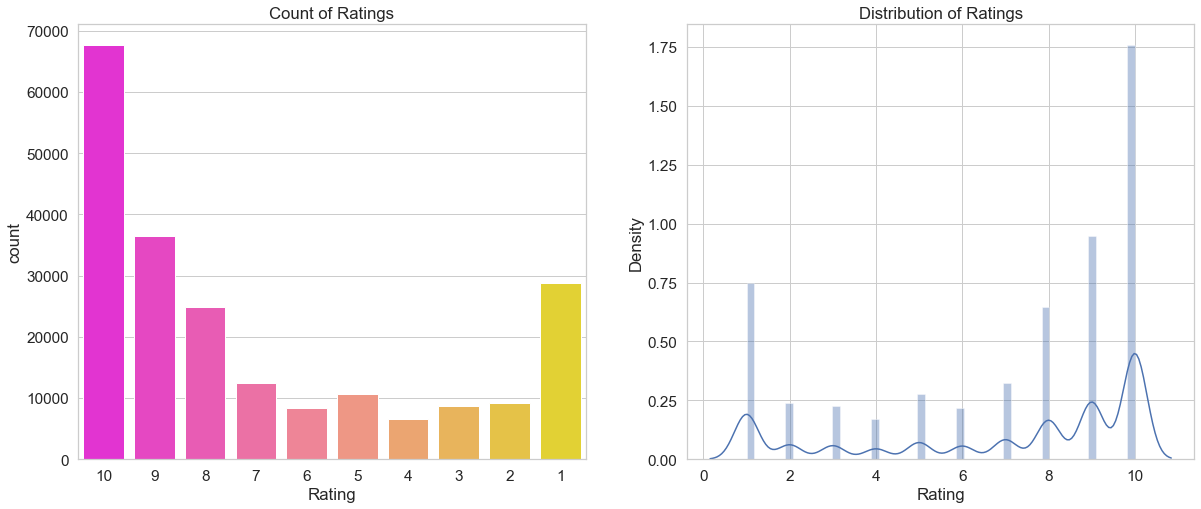

In [23]:
# A countplot of the ratings so we can see the distribution of the ratings
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'whitegrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(df_data['rating'], palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])
sns_2 = sns.distplot(df_data['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")

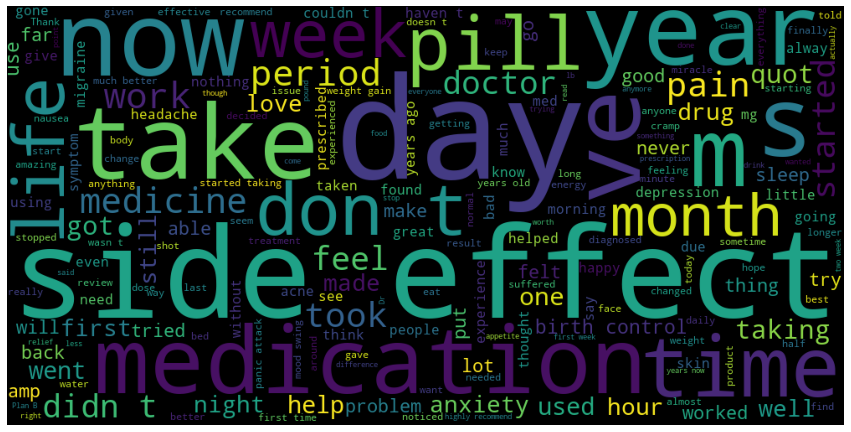

In [24]:
# Word cloud of the reviews with rating equal to 10
df_rate_ten = df_data.loc[df_data.rating == 10, 'review']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

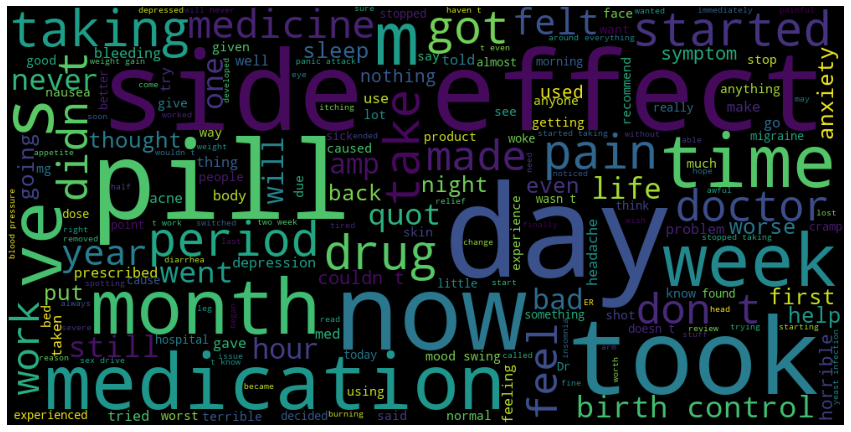

In [25]:
# Word cloud of the reviews with rating equal to 1
df_rate_one = df_data.loc[df_data.rating == 1, 'review']
k1 = (' '.join(df_rate_one))

wordcloud = WordCloud(width = 1000, height = 500).generate(k1)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

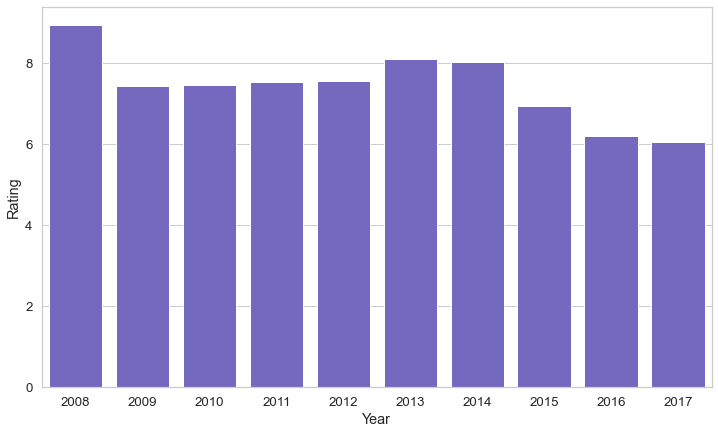

In [26]:
# This barplot shows the mean rating per year

mean_rating = dict(df_data.groupby(df_data['date'].dt.year)['rating'].mean())
plt.rcParams['figure.figsize'] = [12, 7]
sns.set(font_scale = 1.2, style = 'whitegrid')
sns_ = sns.barplot(x = list(mean_rating.keys()), y = list(mean_rating.values()), color = 'slateblue');
sns_.set_xlabel('Year')
sns_.set_ylabel('Rating');

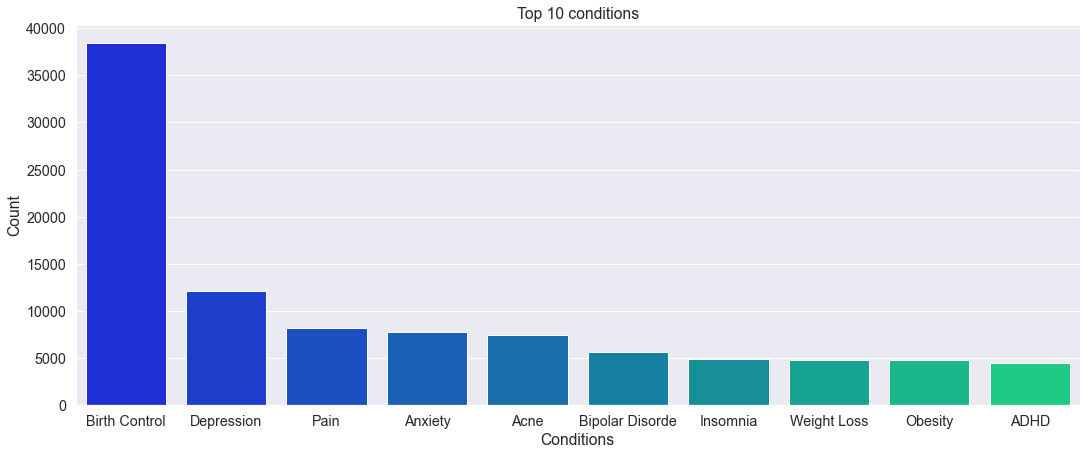

In [27]:
# This barplot show the top 10 conditions the people are suffering.
cond = dict(df_data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");

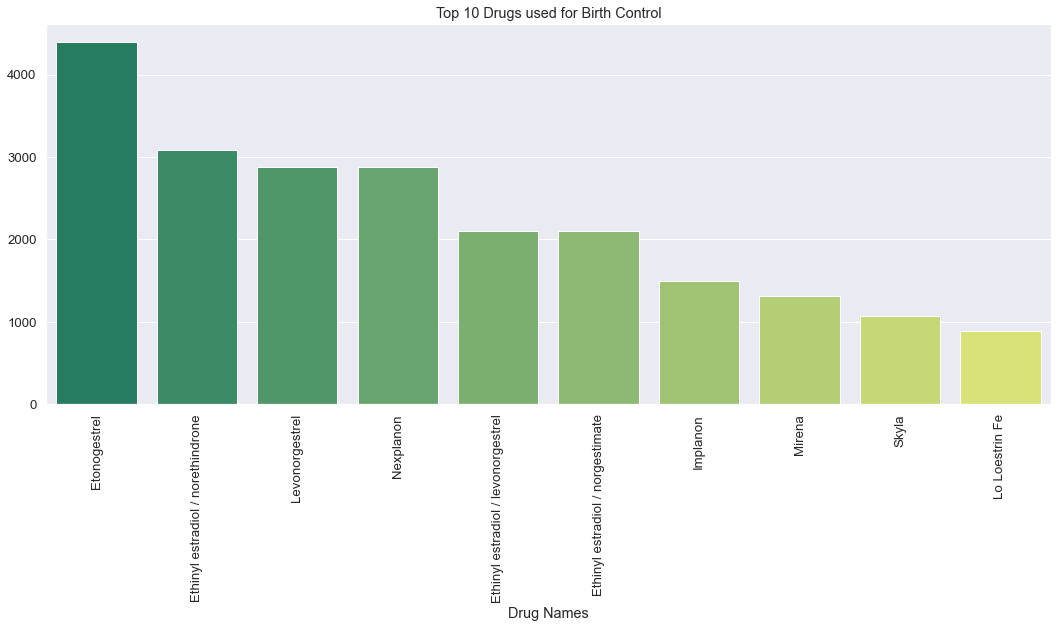

In [28]:
# Top 10 drugs which are used for the top condition, that is Birth Control
df = df_data[df_data['condition'] == 'Birth Control']['drugname'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df.index, y = df.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 90);

<Axes: xlabel='usefulcount', ylabel='Density'>

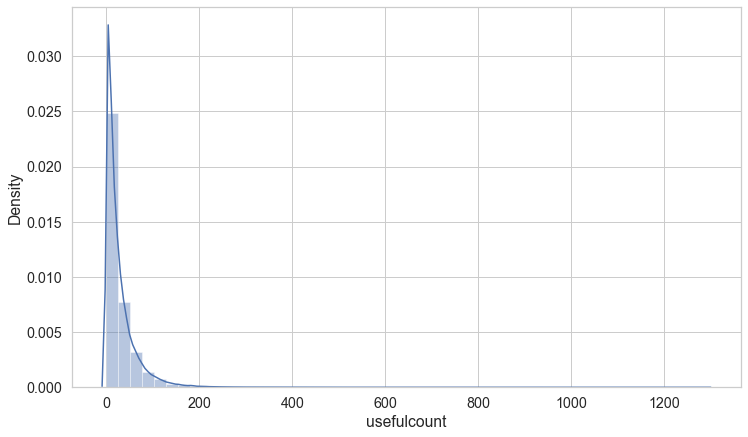

In [29]:
# Distribution of the useful count
sns.set(style = 'whitegrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [12, 7]
sns.distplot(df_data['usefulcount'].dropna())

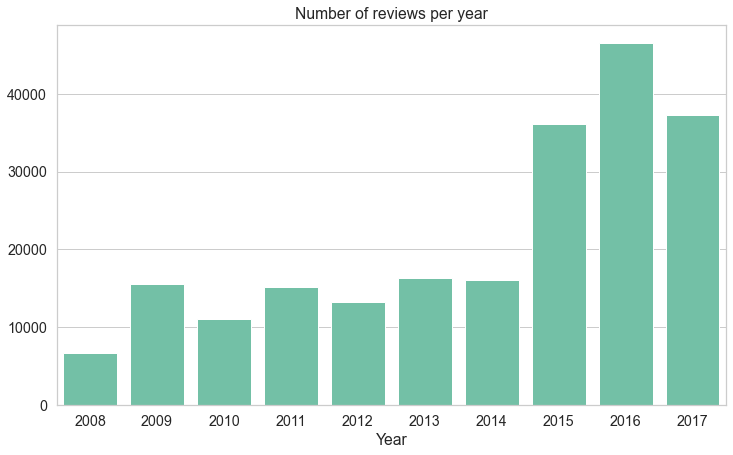

In [30]:
# This barplot shows the number of reviews per year
df = df_data['date'].dt.year.value_counts()
df = df.sort_index()

sns_ = sns.barplot(x = df.index, y = df.values, color = 'mediumaquamarine')
sns_.set_title("Number of reviews per year")
sns_.set_xlabel("Year");

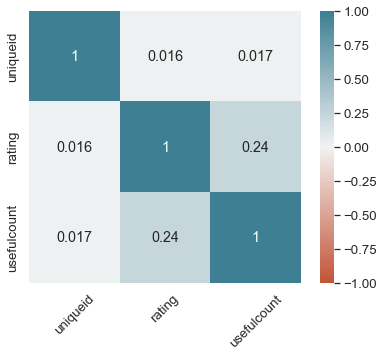

In [31]:
# Heatmap of the correlation matrix
plt.rcParams['figure.figsize'] = [7,5]
sns.set(font_scale = 1.2)
corr = df_data.select_dtypes(include = 'int64').corr()
sns_heat = sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200), square=True);
plt.setp(sns_heat.get_xticklabels(), rotation = 45);

In [32]:
df_data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,2015-10-28,4
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,2015-10-26,12
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,2015-10-25,4


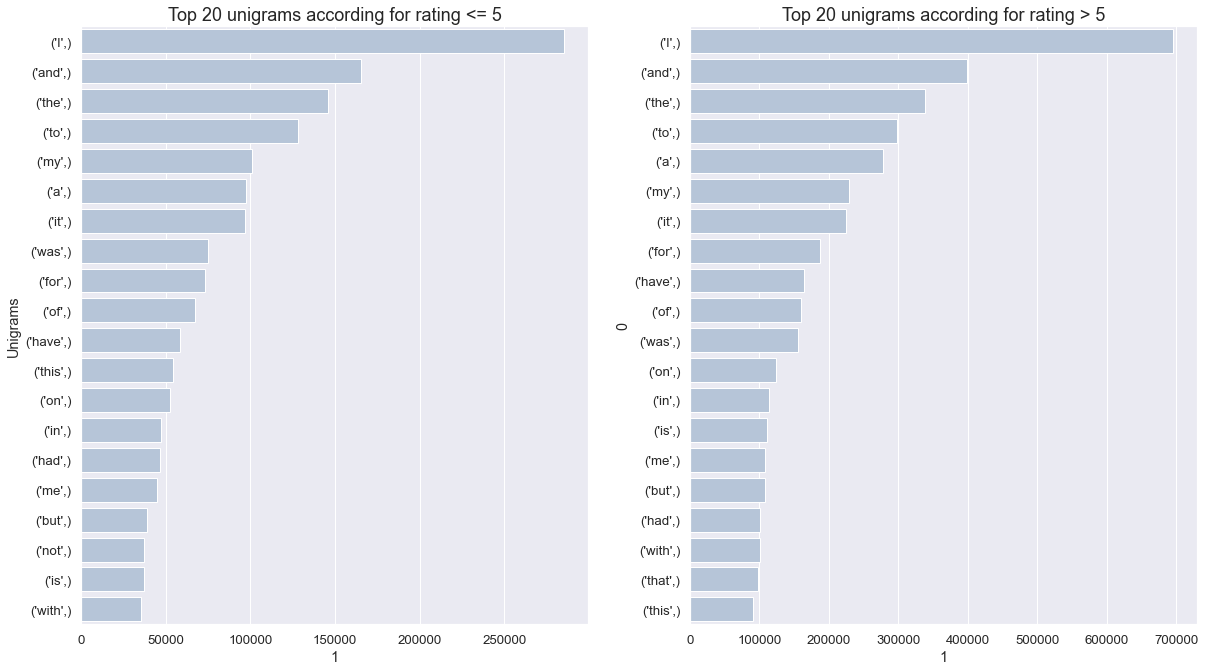

In [33]:
# Top 20 unigrams according to the rating
df_ = df_data[['rating', 'review']]
df_['review'] = df_data['review'].str.replace("&#039;", "")
df_['review'] = df_['review'].str.replace(r'[^\w\d\s]',' ')

df_review_5 = " ".join(df_.loc[df_.rating <= 5, 'review'])
df_review_10 = " ".join(df_.loc[df_.rating > 5, 'review'])

token_review_5 = word_tokenize(df_review_5)
token_review_10 = word_tokenize(df_review_10)

unigrams_5 = ngrams(token_review_5, 1)
unigrams_10 = ngrams(token_review_10, 1)

frequency_5 = Counter(unigrams_5)
frequency_10 = Counter(unigrams_10)

df_5 = pd.DataFrame(frequency_5.most_common(20))
df_10 = pd.DataFrame(frequency_10.most_common(20))

# Barplot that shows the top 20 unigrams
plt.rcParams['figure.figsize'] = [20,11]
fig, ax = plt.subplots(1,2)
sns.set(font_scale = 1.5, style = 'whitegrid')

sns_5 = sns.barplot(x = df_5[1], y = df_5[0], color = 'lightsteelblue', ax = ax[0])
sns_10 = sns.barplot(x = df_10[1], y = df_10[0], color = 'lightsteelblue', ax = ax[1])

# Setting axes labels
sns_5.set_title("Top 20 unigrams according for rating <= 5")
sns_10.set_title("Top 20 unigrams according for rating > 5")
sns_5.set_ylabel("Unigrams");

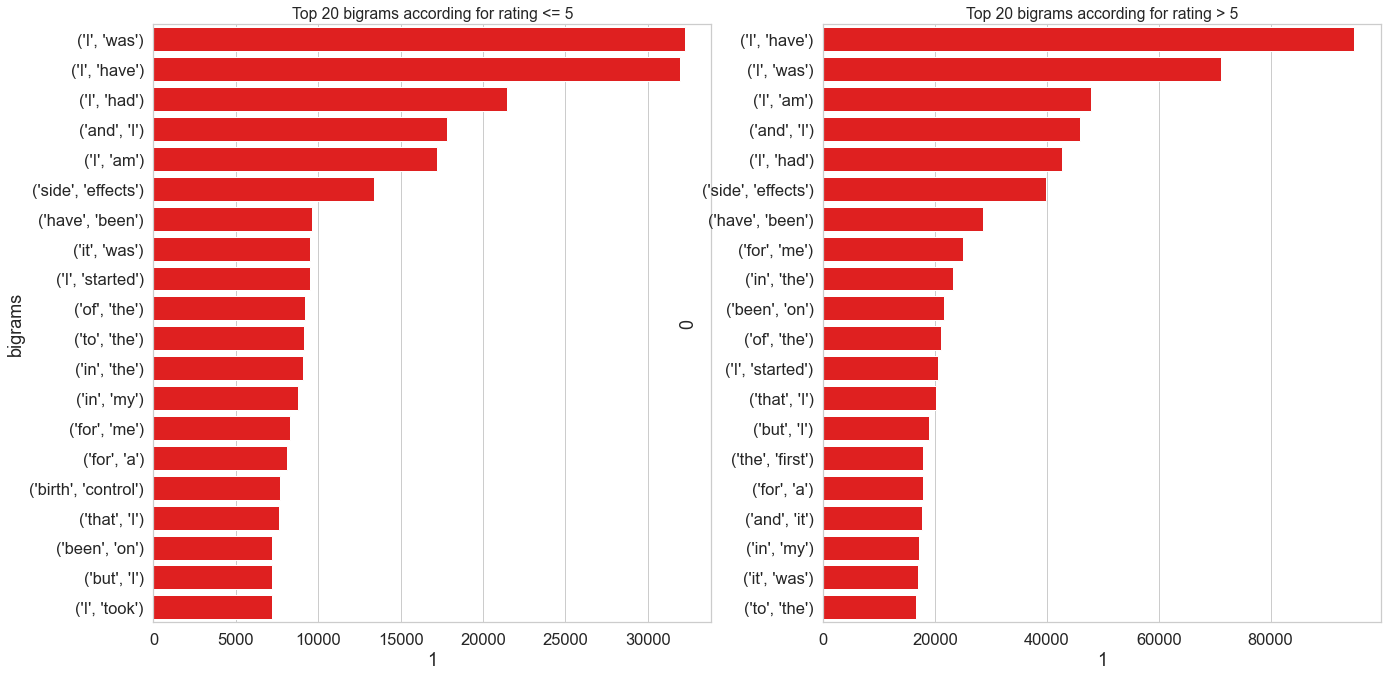

In [34]:
# Top 20 bigrams according to the rating
bigrams_5 = ngrams(token_review_5, 2)
bigrams_10 = ngrams(token_review_10, 2)

frequency_5 = Counter(bigrams_5)
frequency_10 = Counter(bigrams_10)

df_5 = pd.DataFrame(frequency_5.most_common(20))
df_10 = pd.DataFrame(frequency_10.most_common(20))

# Barplot that shows the top 20 bigrams
plt.rcParams['figure.figsize'] = [22,11]
fig, ax = plt.subplots(1,2)
sns.set(font_scale = 1.3, style = 'whitegrid')

sns_5 = sns.barplot(x = df_5[1], y = df_5[0], color = 'red', ax = ax[0])
sns_10 = sns.barplot(x = df_10[1], y = df_10[0], color = 'red', ax = ax[1])

# Setting axes labels
sns_5.set_title("Top 20 bigrams according for rating <= 5")
sns_10.set_title("Top 20 bigrams according for rating > 5")
sns_5.set_ylabel("bigrams");

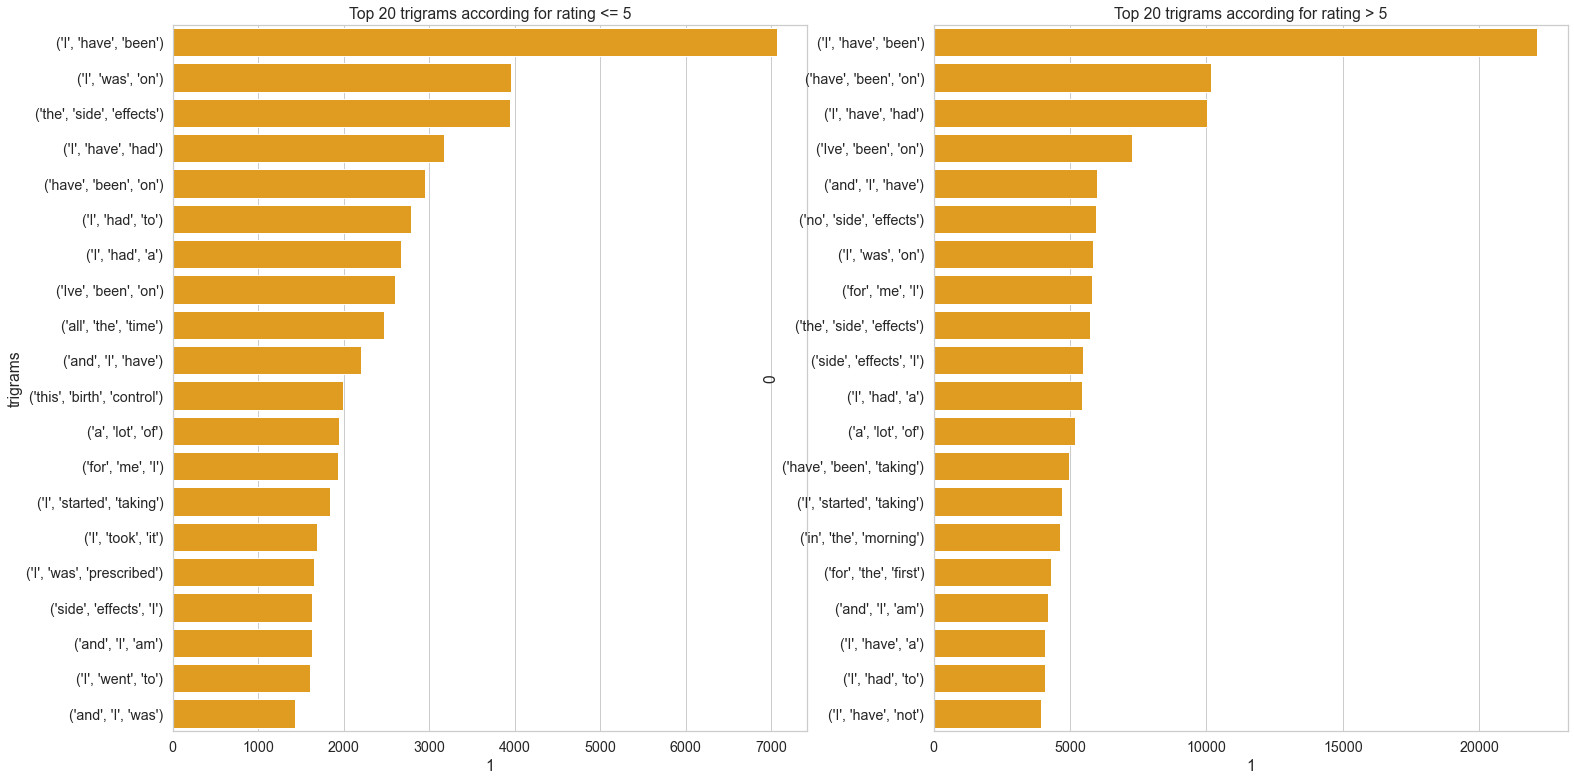

In [35]:
# Top 20 trigrams according to the rating
trigrams_5 = ngrams(token_review_5, 3)
trigrams_10 = ngrams(token_review_10, 3)

frequency_5 = Counter(trigrams_5)
frequency_10 = Counter(trigrams_10)

df_5 = pd.DataFrame(frequency_5.most_common(20))
df_10 = pd.DataFrame(frequency_10.most_common(20))

# Barplot that shows the top 20 trigrams
plt.rcParams['figure.figsize'] = [25,13]
fig, ax = plt.subplots(1,2)
sns.set(font_scale = 1.3, style = 'whitegrid')

sns_5 = sns.barplot(x = df_5[1], y = df_5[0], color = 'orange', ax = ax[0])
sns_10 = sns.barplot(x = df_10[1], y = df_10[0], color = 'orange', ax = ax[1])

# Setting axes labels
sns_5.set_title("Top 20 trigrams according for rating <= 5")
sns_10.set_title("Top 20 trigrams according for rating > 5")
sns_5.set_ylabel("trigrams");

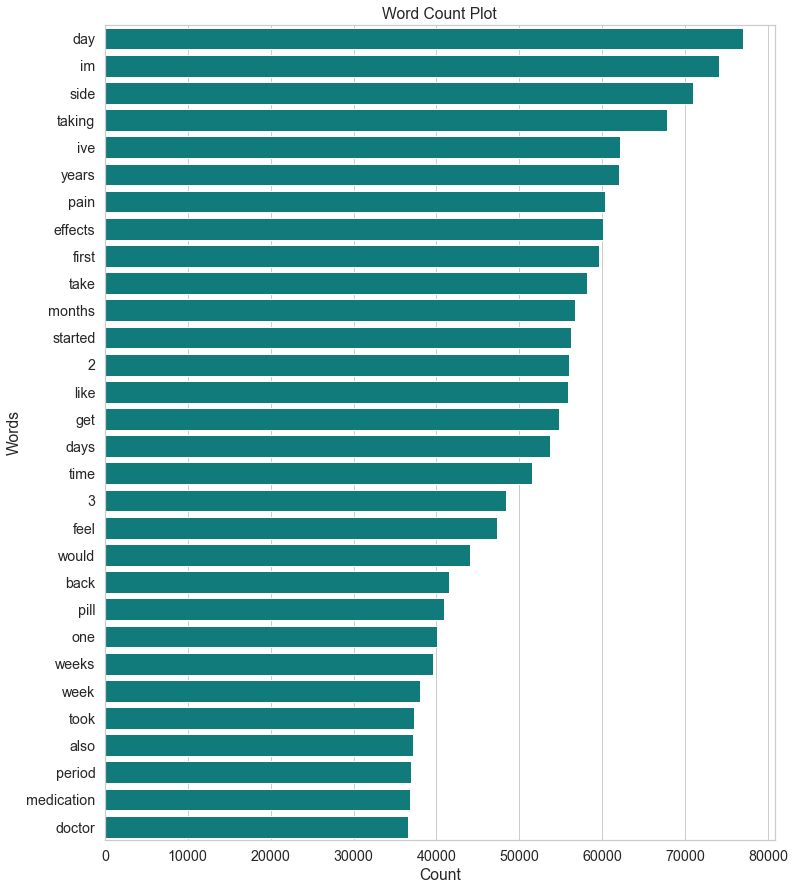

In [38]:
# Word count plot

# Removing the stop words before plotting
stop_words = set(stopwords.words('english'))
df_['review'] = df_['review'].str.lower()
df_['review_1'] = df_['review'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))
df_review = " ".join(df_['review_1'])
tokenize = word_tokenize(df_review)
frequency = Counter(tokenize)
df = pd.DataFrame(frequency.most_common(30))

plt.rcParams['figure.figsize'] = [12, 15]
sns.set(font_scale = 1.3, style = 'whitegrid')

# plotting
word_count = sns.barplot(x = df[1], y = df[0], color = 'darkcyan')
word_count.set_title("Word Count Plot")
word_count.set_ylabel("Words")
word_count.set_xlabel("Count");

### Preprocessing the reviews for the best polarity and classification

In [39]:
# Giving the Sentiment according to the ratings
df_data['sentiment_rate'] = df_data['rating'].apply(lambda x: 1 if x > 5 else 0)

In [40]:
def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [41]:
#df_data['review_clean'] = df_data['review'].apply(review_clean)
df_data['review_clean'] = review_clean(df_data['review'])

In [42]:
# Removing the stopwords
stop_words = set(stopwords.words('english'))
df_data['review_clean'] = df_data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [43]:
# Removing the word stems using the Snowball Stemmer
Snow_ball = SnowballStemmer("english")
df_data['review_clean'] = df_data['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [44]:
df_data['review_clean'][0: 20]

0     depo inject sinc januari 2015 bleed stop anoth...
1     im 21 year old recent found might pcos havent ...
2     shot 11 year month ago never 1 period even spo...
3     ive four shot point birth control pill year du...
4     total 3 shot got first one leav hospit give bi...
5     horribl shot got first shot august ever sinc e...
6     im 18 got heavi bleed ive alway heard bc make ...
7     im 19 heavi pain period sinc forev got depo sh...
8     im 30 year old woman got shot august 9th bleed...
9     im 17 year old got shot august 2015 person don...
10    first month awesom absolut wonder start light ...
11    start depo shot year ago origin bled 3 week da...
12    im 24 ive 2 year quit period last 3 week first...
13    im 17 went depo heavi bleed like heavi would g...
14    love conveni one shot everi three month look b...
15    1st shot sept 2nd nonstop bleed sinc side effe...
16    took shot safe im young teenag sexual activ bi...
17    ive shot 2 year amp one complaint skin cou

In [45]:
# Separating the day, month and year from the Date
df_data['day'] = df_data['date'].dt.day
df_data['month'] = df_data['date'].dt.month
df_data['year'] = df_data['date'].dt.year

In [46]:
df_data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean,day,month,year
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,2015-10-28,4,0,depo inject sinc januari 2015 bleed stop anoth...,28,10,2015
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11,1,im 21 year old recent found might pcos havent ...,27,10,2015
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7,1,shot 11 year month ago never 1 period even spo...,27,10,2015
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,2015-10-26,12,1,ive four shot point birth control pill year du...,26,10,2015
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,2015-10-25,4,0,total 3 shot got first one leav hospit give bi...,25,10,2015


In [47]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [48]:
df_data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean,day,month,year
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,2015-10-28,4,0,depo inject sinc januari 2015 bleed stop anoth...,28,10,2015
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11,1,im 21 year old recent found might pcos havent ...,27,10,2015
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7,1,shot 11 year month ago never 1 period even spo...,27,10,2015
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,2015-10-26,12,1,ive four shot point birth control pill year du...,26,10,2015
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,2015-10-25,4,0,total 3 shot got first one leav hospit give bi...,25,10,2015


In [ ]:
# a pie chart to represent the sentiments of the patients

size = [161491, 53572]
colors = ['lightblue', 'navy']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

In [49]:
df_data['sentiment'] = sentiment(df_data['review'])

In [50]:
df_data['sentiment_clean'] = sentiment(df_data['review_clean'])

The Correlation coefficient between the sentiment of the uncleaned review with rating is greater than the cleaned review, so now lets try without the snowball stemmer and without removing the stopwords.

In [51]:
np.corrcoef(df_data['sentiment'], df_data['rating'])

array([[1.       , 0.3481753],
       [0.3481753, 1.       ]])

In [52]:
np.corrcoef(df_data['sentiment_clean'], df_data['rating'])

array([[1.        , 0.23328393],
       [0.23328393, 1.        ]])

In [53]:
# Cleaning the reviews without removing the stop words and using snowball stemmer
df_data['review_clean_ss'] = review_clean(df_data['review'])
df_data['sentiment_clean_ss'] = sentiment(df_data['review_clean_ss'])

In [54]:
np.corrcoef(df_data['sentiment_clean_ss'], df_data['rating'])

array([[1.        , 0.34600369],
       [0.34600369, 1.        ]])

In [55]:
df_data['condition'].value_counts().head(20)

Birth Control                38436
Depression                   12164
Pain                          8245
Anxiety                       7812
Acne                          7435
Bipolar Disorde               5604
Insomnia                      4904
Weight Loss                   4857
Obesity                       4757
ADHD                          4509
Diabetes, Type 2              3362
Emergency Contraception       3290
High Blood Pressure           3104
Vaginal Yeast Infection       3085
Abnormal Uterine Bleeding     2744
Bowel Preparation             2498
Smoking Cessation             2440
ibromyalgia                   2370
Migraine                      2277
Anxiety and Stress            2236
Name: condition, dtype: int64

In [56]:
df_data.head(10)

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean,day,month,year,sentiment,sentiment_clean,review_clean_ss,sentiment_clean_ss
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,2015-10-28,4,0,depo inject sinc januari 2015 bleed stop anoth...,28,10,2015,-0.287798,-0.127381,been on the depo injection since january 2015 ...,-0.160714
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11,1,im 21 year old recent found might pcos havent ...,27,10,2015,0.175357,0.161429,im 21 years old and recently found out i might...,0.175357
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7,1,shot 11 year month ago never 1 period even spo...,27,10,2015,-0.210000,0.233333,i have been on the shot 11 years and until a m...,-0.210000
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,2015-10-26,12,1,ive four shot point birth control pill year du...,26,10,2015,-0.022500,0.069444,ive had four shots at this point i was on birt...,-0.033333
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,2015-10-25,4,0,total 3 shot got first one leav hospit give bi...,25,10,2015,0.044872,0.103333,i had a total of 3 shots i got my first one be...,0.044872
5,6,Medroxyprogesterone,Birth Control,"""This is a horrible shot!! I got my first shot...",1,2015-10-24,3,0,horribl shot got first shot august ever sinc e...,24,10,2015,0.000321,0.013235,this is a horrible shot i got my first shot in...,0.000321
6,7,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 18 and got this for heavy bleeding. ...",5,2015-10-22,6,0,im 18 got heavi bleed ive alway heard bc make ...,22,10,2015,-0.056692,0.098052,im 18 and got this for heavy bleeding ive alwa...,-0.065025
7,8,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Im 19 and have been having heavy and painful ...",5,2015-10-21,2,0,im 19 heavi pain period sinc forev got depo sh...,21,10,2015,0.030995,0.068750,im 19 and have been having heavy and painful p...,0.026923
8,9,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m a 30 year old woman. I got the shot ...",2,2015-10-21,5,0,im 30 year old woman got shot august 9th bleed...,21,10,2015,0.265309,0.288889,im a 30 year old woman i got the shot on augus...,0.265309
9,10,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 17 years old and I got shot in Augus...",7,2015-10-20,2,1,im 17 year old got shot august 2015 person don...,20,10,2015,-0.047222,-0.022500,im 17 years old and i got shot in august 2015 ...,-0.047222


### Feature Engineering

In [57]:
#Word count in each review
df_data['count_word']=df_data["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count 
df_data['count_unique_word']=df_data["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
df_data['count_letters']=df_data["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
df_data["count_punctuations"] = df_data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df_data["count_words_upper"] = df_data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
df_data["count_words_title"] = df_data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df_data["count_stopwords"] = df_data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
df_data["mean_word_len"] = df_data["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [58]:
df_data.columns

Index(['uniqueid', 'drugname', 'condition', 'review', 'rating', 'date',
       'usefulcount', 'sentiment_rate', 'review_clean', 'day', 'month', 'year',
       'sentiment', 'sentiment_clean', 'review_clean_ss', 'sentiment_clean_ss',
       'count_word', 'count_unique_word', 'count_letters',
       'count_punctuations', 'count_words_upper', 'count_words_title',
       'count_stopwords', 'mean_word_len'],
      dtype='object')

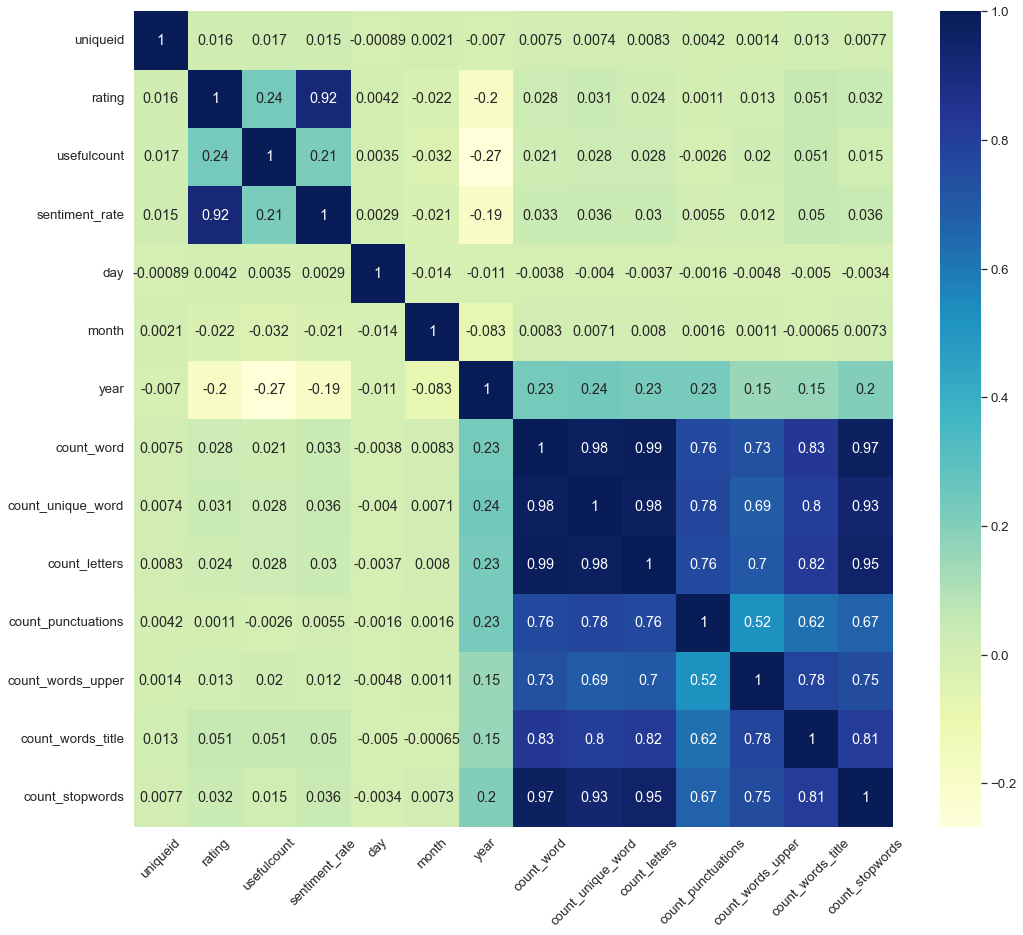

In [59]:
# Correlation Heatmap of the features engineered
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = df_data.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'YlGnBu')
plt.setp(sns_.get_xticklabels(), rotation = 45);

In [60]:
# Label Encoding Drugname and Conditions
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugname', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    df_data[feature] = label_encoder_feat[feature].fit_transform(df_data[feature])

### Modelling

In [63]:
# Importing Libraries for the Machine Learning Model
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [64]:
# Defining Features and splitting the data as train and test set

features = df_data[['condition', 'usefulcount', 'sentiment', 'day', 'month', 'year',
                   'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]

target = df_data['sentiment_rate']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (149708, 15)
The Test set size  (64161, 15)


Model - I LightGBM

In [65]:
# Training Model - I
clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model = clf.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

The Accuracy of the model is :  0.888935646264865
The confusion Matrix is 


array([[14800,  4545],
       [ 2581, 42235]], dtype=int64)

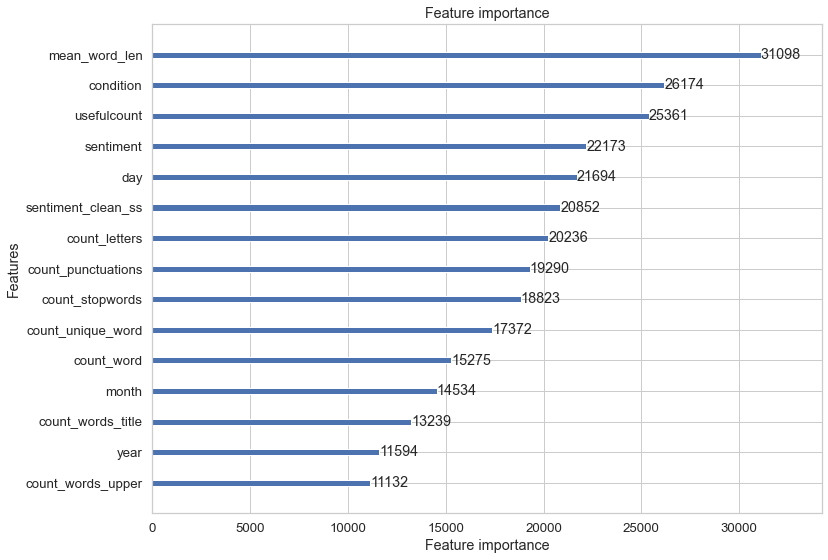

In [66]:
# Feature Importance Plot using LGBM
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'whitegrid', font_scale = 1.2)
plot_importance(model);

Model - II XGBClassifier

In [67]:
# Training Model - II
from xgboost import plot_importance
xgb_clf = XGBClassifier(n_estimator = 10000,
                    learning_rate=0.10,
                    num_leaves=30)

model_xgb = xgb_clf.fit(X_train, y_train)

# Predictions
predictions_2 = model_xgb.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions_2))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions_2)

[02:57:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimator", "num_leaves" } are not used.

The Accuracy of the model is :  0.7685042315425258
The confusion Matrix is 


array([[ 8197, 11148],
       [ 3705, 41111]], dtype=int64)

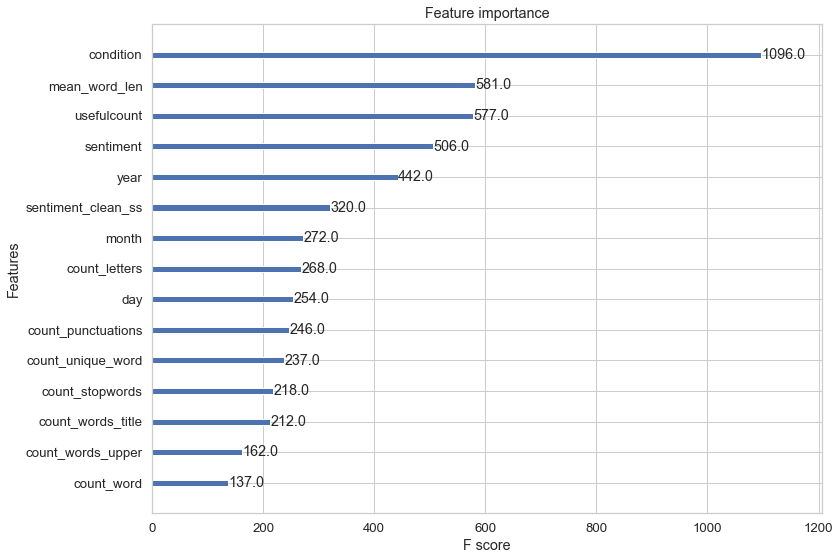

In [68]:
# Feature Importance Plot using XGBClassifier
plt.rcParams['figure.figsize'] = [12, 9]
plot_importance(model_xgb);

Model - III CatBoostClassifier

In [69]:
# Training Model - III
cat_clf = CatBoostClassifier(iterations = 10000,
                            learning_rate = 0.5)

model_cat = cat_clf.fit(X_train, y_train);

# Predictions
predictions_3 = model_cat.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions_3))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions_3)

0:	learn: 0.5592563	total: 186ms	remaining: 30m 57s
1:	learn: 0.5270140	total: 213ms	remaining: 17m 45s
2:	learn: 0.5162758	total: 238ms	remaining: 13m 14s
3:	learn: 0.5107854	total: 267ms	remaining: 11m 7s
4:	learn: 0.5091914	total: 294ms	remaining: 9m 47s
5:	learn: 0.5062746	total: 324ms	remaining: 9m
6:	learn: 0.5024082	total: 352ms	remaining: 8m 22s
7:	learn: 0.5006831	total: 379ms	remaining: 7m 53s
8:	learn: 0.4992477	total: 415ms	remaining: 7m 40s
9:	learn: 0.4982441	total: 442ms	remaining: 7m 21s
10:	learn: 0.4970973	total: 471ms	remaining: 7m 7s
11:	learn: 0.4962257	total: 498ms	remaining: 6m 54s
12:	learn: 0.4955755	total: 525ms	remaining: 6m 43s
13:	learn: 0.4947171	total: 553ms	remaining: 6m 34s
14:	learn: 0.4939002	total: 581ms	remaining: 6m 26s
15:	learn: 0.4930438	total: 608ms	remaining: 6m 19s
16:	learn: 0.4922911	total: 643ms	remaining: 6m 17s
17:	learn: 0.4914661	total: 671ms	remaining: 6m 12s
18:	learn: 0.4911511	total: 699ms	remaining: 6m 6s
19:	learn: 0.4906873	tota

160:	learn: 0.4368738	total: 5.5s	remaining: 5m 36s
161:	learn: 0.4365799	total: 5.53s	remaining: 5m 36s
162:	learn: 0.4363871	total: 5.58s	remaining: 5m 36s
163:	learn: 0.4361896	total: 5.61s	remaining: 5m 36s
164:	learn: 0.4358407	total: 5.64s	remaining: 5m 36s
165:	learn: 0.4355270	total: 5.67s	remaining: 5m 36s
166:	learn: 0.4352981	total: 5.7s	remaining: 5m 35s
167:	learn: 0.4350069	total: 5.75s	remaining: 5m 36s
168:	learn: 0.4346835	total: 5.78s	remaining: 5m 36s
169:	learn: 0.4344699	total: 5.81s	remaining: 5m 36s
170:	learn: 0.4340594	total: 5.84s	remaining: 5m 35s
171:	learn: 0.4338334	total: 5.87s	remaining: 5m 35s
172:	learn: 0.4335582	total: 5.9s	remaining: 5m 35s
173:	learn: 0.4333493	total: 5.93s	remaining: 5m 34s
174:	learn: 0.4330662	total: 5.96s	remaining: 5m 34s
175:	learn: 0.4328742	total: 5.99s	remaining: 5m 34s
176:	learn: 0.4326520	total: 6.02s	remaining: 5m 34s
177:	learn: 0.4324039	total: 6.05s	remaining: 5m 33s
178:	learn: 0.4322176	total: 6.08s	remaining: 5m 

317:	learn: 0.3985581	total: 10.6s	remaining: 5m 23s
318:	learn: 0.3983689	total: 10.6s	remaining: 5m 23s
319:	learn: 0.3982005	total: 10.7s	remaining: 5m 23s
320:	learn: 0.3980291	total: 10.7s	remaining: 5m 22s
321:	learn: 0.3977227	total: 10.7s	remaining: 5m 22s
322:	learn: 0.3974440	total: 10.8s	remaining: 5m 22s
323:	learn: 0.3971456	total: 10.8s	remaining: 5m 22s
324:	learn: 0.3968594	total: 10.8s	remaining: 5m 22s
325:	learn: 0.3966889	total: 10.9s	remaining: 5m 22s
326:	learn: 0.3964842	total: 10.9s	remaining: 5m 22s
327:	learn: 0.3962748	total: 10.9s	remaining: 5m 22s
328:	learn: 0.3961808	total: 11s	remaining: 5m 23s
329:	learn: 0.3959935	total: 11s	remaining: 5m 23s
330:	learn: 0.3957964	total: 11.1s	remaining: 5m 23s
331:	learn: 0.3955399	total: 11.1s	remaining: 5m 23s
332:	learn: 0.3953674	total: 11.2s	remaining: 5m 24s
333:	learn: 0.3951347	total: 11.2s	remaining: 5m 24s
334:	learn: 0.3949131	total: 11.2s	remaining: 5m 24s
335:	learn: 0.3946980	total: 11.3s	remaining: 5m 2

473:	learn: 0.3660949	total: 15.9s	remaining: 5m 19s
474:	learn: 0.3658941	total: 15.9s	remaining: 5m 19s
475:	learn: 0.3657204	total: 16s	remaining: 5m 19s
476:	learn: 0.3655705	total: 16s	remaining: 5m 19s
477:	learn: 0.3653954	total: 16s	remaining: 5m 19s
478:	learn: 0.3651923	total: 16.1s	remaining: 5m 19s
479:	learn: 0.3650520	total: 16.1s	remaining: 5m 18s
480:	learn: 0.3648401	total: 16.1s	remaining: 5m 18s
481:	learn: 0.3646809	total: 16.1s	remaining: 5m 18s
482:	learn: 0.3645168	total: 16.2s	remaining: 5m 18s
483:	learn: 0.3643639	total: 16.2s	remaining: 5m 18s
484:	learn: 0.3642203	total: 16.2s	remaining: 5m 18s
485:	learn: 0.3640062	total: 16.3s	remaining: 5m 18s
486:	learn: 0.3638630	total: 16.3s	remaining: 5m 18s
487:	learn: 0.3636581	total: 16.3s	remaining: 5m 18s
488:	learn: 0.3633995	total: 16.4s	remaining: 5m 18s
489:	learn: 0.3633053	total: 16.4s	remaining: 5m 18s
490:	learn: 0.3631273	total: 16.4s	remaining: 5m 18s
491:	learn: 0.3629258	total: 16.5s	remaining: 5m 18s

632:	learn: 0.3390557	total: 20.9s	remaining: 5m 9s
633:	learn: 0.3388709	total: 20.9s	remaining: 5m 9s
634:	learn: 0.3386809	total: 21s	remaining: 5m 9s
635:	learn: 0.3384807	total: 21s	remaining: 5m 9s
636:	learn: 0.3382544	total: 21s	remaining: 5m 9s
637:	learn: 0.3380881	total: 21.1s	remaining: 5m 8s
638:	learn: 0.3379325	total: 21.1s	remaining: 5m 8s
639:	learn: 0.3377104	total: 21.1s	remaining: 5m 9s
640:	learn: 0.3375898	total: 21.2s	remaining: 5m 8s
641:	learn: 0.3374688	total: 21.2s	remaining: 5m 8s
642:	learn: 0.3372534	total: 21.2s	remaining: 5m 8s
643:	learn: 0.3371058	total: 21.3s	remaining: 5m 8s
644:	learn: 0.3368697	total: 21.3s	remaining: 5m 8s
645:	learn: 0.3367190	total: 21.3s	remaining: 5m 8s
646:	learn: 0.3366141	total: 21.3s	remaining: 5m 8s
647:	learn: 0.3364741	total: 21.4s	remaining: 5m 8s
648:	learn: 0.3362499	total: 21.4s	remaining: 5m 8s
649:	learn: 0.3360172	total: 21.4s	remaining: 5m 8s
650:	learn: 0.3357789	total: 21.5s	remaining: 5m 8s
651:	learn: 0.3356

793:	learn: 0.3133753	total: 26s	remaining: 5m 1s
794:	learn: 0.3132704	total: 26s	remaining: 5m 1s
795:	learn: 0.3131298	total: 26.1s	remaining: 5m 1s
796:	learn: 0.3129474	total: 26.1s	remaining: 5m 1s
797:	learn: 0.3127936	total: 26.1s	remaining: 5m 1s
798:	learn: 0.3126399	total: 26.2s	remaining: 5m 1s
799:	learn: 0.3124715	total: 26.2s	remaining: 5m 1s
800:	learn: 0.3123424	total: 26.2s	remaining: 5m 1s
801:	learn: 0.3122335	total: 26.3s	remaining: 5m 1s
802:	learn: 0.3121346	total: 26.3s	remaining: 5m 1s
803:	learn: 0.3120058	total: 26.3s	remaining: 5m 1s
804:	learn: 0.3118733	total: 26.4s	remaining: 5m 1s
805:	learn: 0.3117531	total: 26.4s	remaining: 5m 1s
806:	learn: 0.3116286	total: 26.4s	remaining: 5m
807:	learn: 0.3115585	total: 26.5s	remaining: 5m
808:	learn: 0.3113690	total: 26.5s	remaining: 5m
809:	learn: 0.3111799	total: 26.5s	remaining: 5m
810:	learn: 0.3110301	total: 26.5s	remaining: 5m
811:	learn: 0.3108859	total: 26.6s	remaining: 5m
812:	learn: 0.3107496	total: 26.6s

958:	learn: 0.2904098	total: 31.8s	remaining: 4m 59s
959:	learn: 0.2902787	total: 31.8s	remaining: 4m 59s
960:	learn: 0.2901594	total: 31.8s	remaining: 4m 59s
961:	learn: 0.2900145	total: 31.9s	remaining: 4m 59s
962:	learn: 0.2898657	total: 31.9s	remaining: 4m 59s
963:	learn: 0.2897119	total: 31.9s	remaining: 4m 59s
964:	learn: 0.2895506	total: 32s	remaining: 4m 59s
965:	learn: 0.2894179	total: 32s	remaining: 4m 59s
966:	learn: 0.2892628	total: 32s	remaining: 4m 59s
967:	learn: 0.2891170	total: 32.1s	remaining: 4m 59s
968:	learn: 0.2889385	total: 32.1s	remaining: 4m 59s
969:	learn: 0.2887926	total: 32.1s	remaining: 4m 59s
970:	learn: 0.2886709	total: 32.2s	remaining: 4m 59s
971:	learn: 0.2885610	total: 32.2s	remaining: 4m 59s
972:	learn: 0.2885340	total: 32.2s	remaining: 4m 59s
973:	learn: 0.2883596	total: 32.3s	remaining: 4m 59s
974:	learn: 0.2881948	total: 32.3s	remaining: 4m 59s
975:	learn: 0.2880435	total: 32.3s	remaining: 4m 58s
976:	learn: 0.2879423	total: 32.4s	remaining: 4m 58s

1112:	learn: 0.2699126	total: 37.1s	remaining: 4m 56s
1113:	learn: 0.2697886	total: 37.2s	remaining: 4m 56s
1114:	learn: 0.2697238	total: 37.2s	remaining: 4m 56s
1115:	learn: 0.2696059	total: 37.2s	remaining: 4m 56s
1116:	learn: 0.2695213	total: 37.2s	remaining: 4m 56s
1117:	learn: 0.2693745	total: 37.3s	remaining: 4m 56s
1118:	learn: 0.2693195	total: 37.3s	remaining: 4m 56s
1119:	learn: 0.2691914	total: 37.3s	remaining: 4m 56s
1120:	learn: 0.2690968	total: 37.4s	remaining: 4m 56s
1121:	learn: 0.2689602	total: 37.4s	remaining: 4m 56s
1122:	learn: 0.2688205	total: 37.5s	remaining: 4m 56s
1123:	learn: 0.2686867	total: 37.5s	remaining: 4m 56s
1124:	learn: 0.2685440	total: 37.5s	remaining: 4m 56s
1125:	learn: 0.2683563	total: 37.6s	remaining: 4m 56s
1126:	learn: 0.2682820	total: 37.6s	remaining: 4m 55s
1127:	learn: 0.2681450	total: 37.6s	remaining: 4m 55s
1128:	learn: 0.2680528	total: 37.7s	remaining: 4m 55s
1129:	learn: 0.2679042	total: 37.7s	remaining: 4m 55s
1130:	learn: 0.2677637	total

1270:	learn: 0.2513184	total: 43s	remaining: 4m 55s
1271:	learn: 0.2512322	total: 43s	remaining: 4m 55s
1272:	learn: 0.2510912	total: 43s	remaining: 4m 55s
1273:	learn: 0.2509883	total: 43.1s	remaining: 4m 55s
1274:	learn: 0.2508614	total: 43.1s	remaining: 4m 55s
1275:	learn: 0.2507520	total: 43.2s	remaining: 4m 55s
1276:	learn: 0.2505784	total: 43.2s	remaining: 4m 55s
1277:	learn: 0.2505086	total: 43.2s	remaining: 4m 55s
1278:	learn: 0.2503345	total: 43.3s	remaining: 4m 55s
1279:	learn: 0.2502338	total: 43.3s	remaining: 4m 55s
1280:	learn: 0.2500740	total: 43.3s	remaining: 4m 55s
1281:	learn: 0.2499809	total: 43.4s	remaining: 4m 54s
1282:	learn: 0.2498607	total: 43.4s	remaining: 4m 54s
1283:	learn: 0.2497721	total: 43.4s	remaining: 4m 54s
1284:	learn: 0.2496423	total: 43.5s	remaining: 4m 54s
1285:	learn: 0.2495116	total: 43.5s	remaining: 4m 54s
1286:	learn: 0.2494284	total: 43.5s	remaining: 4m 54s
1287:	learn: 0.2492994	total: 43.6s	remaining: 4m 54s
1288:	learn: 0.2492274	total: 43.6

1427:	learn: 0.2338040	total: 48.5s	remaining: 4m 51s
1428:	learn: 0.2337273	total: 48.5s	remaining: 4m 51s
1429:	learn: 0.2336426	total: 48.6s	remaining: 4m 51s
1430:	learn: 0.2335191	total: 48.6s	remaining: 4m 51s
1431:	learn: 0.2333963	total: 48.6s	remaining: 4m 51s
1432:	learn: 0.2332708	total: 48.7s	remaining: 4m 51s
1433:	learn: 0.2331895	total: 48.7s	remaining: 4m 50s
1434:	learn: 0.2331077	total: 48.8s	remaining: 4m 50s
1435:	learn: 0.2329896	total: 48.8s	remaining: 4m 50s
1436:	learn: 0.2328152	total: 48.8s	remaining: 4m 50s
1437:	learn: 0.2325981	total: 48.9s	remaining: 4m 50s
1438:	learn: 0.2324745	total: 48.9s	remaining: 4m 50s
1439:	learn: 0.2323652	total: 48.9s	remaining: 4m 50s
1440:	learn: 0.2322023	total: 49s	remaining: 4m 50s
1441:	learn: 0.2320546	total: 49s	remaining: 4m 50s
1442:	learn: 0.2319408	total: 49s	remaining: 4m 50s
1443:	learn: 0.2318204	total: 49.1s	remaining: 4m 50s
1444:	learn: 0.2317411	total: 49.1s	remaining: 4m 50s
1445:	learn: 0.2316160	total: 49.1

1584:	learn: 0.2172734	total: 54.3s	remaining: 4m 48s
1585:	learn: 0.2171716	total: 54.3s	remaining: 4m 48s
1586:	learn: 0.2170324	total: 54.4s	remaining: 4m 48s
1587:	learn: 0.2169506	total: 54.4s	remaining: 4m 48s
1588:	learn: 0.2168443	total: 54.4s	remaining: 4m 48s
1589:	learn: 0.2167641	total: 54.5s	remaining: 4m 48s
1590:	learn: 0.2166727	total: 54.5s	remaining: 4m 48s
1591:	learn: 0.2165963	total: 54.5s	remaining: 4m 48s
1592:	learn: 0.2165250	total: 54.6s	remaining: 4m 47s
1593:	learn: 0.2164065	total: 54.6s	remaining: 4m 48s
1594:	learn: 0.2163158	total: 54.7s	remaining: 4m 48s
1595:	learn: 0.2161976	total: 54.7s	remaining: 4m 48s
1596:	learn: 0.2161175	total: 54.8s	remaining: 4m 48s
1597:	learn: 0.2160485	total: 54.8s	remaining: 4m 48s
1598:	learn: 0.2159276	total: 54.8s	remaining: 4m 48s
1599:	learn: 0.2158372	total: 54.9s	remaining: 4m 48s
1600:	learn: 0.2157538	total: 54.9s	remaining: 4m 48s
1601:	learn: 0.2156700	total: 55s	remaining: 4m 48s
1602:	learn: 0.2156182	total: 

1740:	learn: 0.2032768	total: 1m	remaining: 4m 46s
1741:	learn: 0.2031656	total: 1m	remaining: 4m 46s
1742:	learn: 0.2030767	total: 1m	remaining: 4m 46s
1743:	learn: 0.2029748	total: 1m	remaining: 4m 46s
1744:	learn: 0.2029140	total: 1m	remaining: 4m 46s
1745:	learn: 0.2028347	total: 1m	remaining: 4m 46s
1746:	learn: 0.2027554	total: 1m	remaining: 4m 46s
1747:	learn: 0.2026246	total: 1m	remaining: 4m 46s
1748:	learn: 0.2024721	total: 1m	remaining: 4m 46s
1749:	learn: 0.2023587	total: 1m	remaining: 4m 46s
1750:	learn: 0.2022601	total: 1m	remaining: 4m 46s
1751:	learn: 0.2022136	total: 1m	remaining: 4m 46s
1752:	learn: 0.2021455	total: 1m	remaining: 4m 46s
1753:	learn: 0.2020604	total: 1m	remaining: 4m 46s
1754:	learn: 0.2019834	total: 1m 1s	remaining: 4m 46s
1755:	learn: 0.2019314	total: 1m 1s	remaining: 4m 46s
1756:	learn: 0.2018267	total: 1m 1s	remaining: 4m 46s
1757:	learn: 0.2017286	total: 1m 1s	remaining: 4m 46s
1758:	learn: 0.2016689	total: 1m 1s	remaining: 4m 46s
1759:	learn: 0.2

1899:	learn: 0.1895859	total: 1m 6s	remaining: 4m 42s
1900:	learn: 0.1895052	total: 1m 6s	remaining: 4m 42s
1901:	learn: 0.1894191	total: 1m 6s	remaining: 4m 42s
1902:	learn: 0.1893734	total: 1m 6s	remaining: 4m 42s
1903:	learn: 0.1892864	total: 1m 6s	remaining: 4m 42s
1904:	learn: 0.1891819	total: 1m 6s	remaining: 4m 42s
1905:	learn: 0.1890718	total: 1m 6s	remaining: 4m 42s
1906:	learn: 0.1889811	total: 1m 6s	remaining: 4m 42s
1907:	learn: 0.1889157	total: 1m 6s	remaining: 4m 42s
1908:	learn: 0.1888011	total: 1m 6s	remaining: 4m 42s
1909:	learn: 0.1887521	total: 1m 6s	remaining: 4m 42s
1910:	learn: 0.1886653	total: 1m 6s	remaining: 4m 42s
1911:	learn: 0.1885754	total: 1m 6s	remaining: 4m 42s
1912:	learn: 0.1884882	total: 1m 6s	remaining: 4m 42s
1913:	learn: 0.1884041	total: 1m 6s	remaining: 4m 42s
1914:	learn: 0.1883032	total: 1m 6s	remaining: 4m 42s
1915:	learn: 0.1882294	total: 1m 6s	remaining: 4m 42s
1916:	learn: 0.1881589	total: 1m 6s	remaining: 4m 42s
1917:	learn: 0.1880892	total

2055:	learn: 0.1772846	total: 1m 13s	remaining: 4m 42s
2056:	learn: 0.1772065	total: 1m 13s	remaining: 4m 42s
2057:	learn: 0.1771390	total: 1m 13s	remaining: 4m 42s
2058:	learn: 0.1770488	total: 1m 13s	remaining: 4m 42s
2059:	learn: 0.1769607	total: 1m 13s	remaining: 4m 42s
2060:	learn: 0.1768653	total: 1m 13s	remaining: 4m 42s
2061:	learn: 0.1767902	total: 1m 13s	remaining: 4m 42s
2062:	learn: 0.1767190	total: 1m 13s	remaining: 4m 42s
2063:	learn: 0.1766636	total: 1m 13s	remaining: 4m 42s
2064:	learn: 0.1765891	total: 1m 13s	remaining: 4m 42s
2065:	learn: 0.1765627	total: 1m 13s	remaining: 4m 42s
2066:	learn: 0.1764647	total: 1m 13s	remaining: 4m 42s
2067:	learn: 0.1763552	total: 1m 13s	remaining: 4m 42s
2068:	learn: 0.1762909	total: 1m 13s	remaining: 4m 42s
2069:	learn: 0.1762577	total: 1m 13s	remaining: 4m 41s
2070:	learn: 0.1762045	total: 1m 13s	remaining: 4m 41s
2071:	learn: 0.1761194	total: 1m 13s	remaining: 4m 41s
2072:	learn: 0.1760497	total: 1m 13s	remaining: 4m 41s
2073:	lear

2209:	learn: 0.1657678	total: 1m 19s	remaining: 4m 39s
2210:	learn: 0.1656776	total: 1m 19s	remaining: 4m 39s
2211:	learn: 0.1656357	total: 1m 19s	remaining: 4m 39s
2212:	learn: 0.1655431	total: 1m 19s	remaining: 4m 39s
2213:	learn: 0.1654819	total: 1m 19s	remaining: 4m 39s
2214:	learn: 0.1654062	total: 1m 19s	remaining: 4m 39s
2215:	learn: 0.1653176	total: 1m 19s	remaining: 4m 38s
2216:	learn: 0.1652186	total: 1m 19s	remaining: 4m 38s
2217:	learn: 0.1651425	total: 1m 19s	remaining: 4m 38s
2218:	learn: 0.1650893	total: 1m 19s	remaining: 4m 38s
2219:	learn: 0.1650020	total: 1m 19s	remaining: 4m 38s
2220:	learn: 0.1649192	total: 1m 19s	remaining: 4m 38s
2221:	learn: 0.1648411	total: 1m 19s	remaining: 4m 38s
2222:	learn: 0.1647660	total: 1m 19s	remaining: 4m 38s
2223:	learn: 0.1646850	total: 1m 19s	remaining: 4m 38s
2224:	learn: 0.1646028	total: 1m 19s	remaining: 4m 38s
2225:	learn: 0.1645468	total: 1m 19s	remaining: 4m 38s
2226:	learn: 0.1644988	total: 1m 19s	remaining: 4m 38s
2227:	lear

2363:	learn: 0.1551428	total: 1m 25s	remaining: 4m 36s
2364:	learn: 0.1550842	total: 1m 25s	remaining: 4m 36s
2365:	learn: 0.1549908	total: 1m 25s	remaining: 4m 36s
2366:	learn: 0.1549488	total: 1m 25s	remaining: 4m 36s
2367:	learn: 0.1548703	total: 1m 25s	remaining: 4m 36s
2368:	learn: 0.1548244	total: 1m 25s	remaining: 4m 36s
2369:	learn: 0.1547925	total: 1m 25s	remaining: 4m 36s
2370:	learn: 0.1547401	total: 1m 25s	remaining: 4m 36s
2371:	learn: 0.1546842	total: 1m 25s	remaining: 4m 36s
2372:	learn: 0.1546447	total: 1m 25s	remaining: 4m 36s
2373:	learn: 0.1546091	total: 1m 25s	remaining: 4m 36s
2374:	learn: 0.1545289	total: 1m 25s	remaining: 4m 35s
2375:	learn: 0.1544681	total: 1m 26s	remaining: 4m 35s
2376:	learn: 0.1543835	total: 1m 26s	remaining: 4m 35s
2377:	learn: 0.1543260	total: 1m 26s	remaining: 4m 35s
2378:	learn: 0.1542546	total: 1m 26s	remaining: 4m 35s
2379:	learn: 0.1541839	total: 1m 26s	remaining: 4m 35s
2380:	learn: 0.1541022	total: 1m 26s	remaining: 4m 35s
2381:	lear

2516:	learn: 0.1452292	total: 1m 31s	remaining: 4m 30s
2517:	learn: 0.1451656	total: 1m 31s	remaining: 4m 30s
2518:	learn: 0.1451078	total: 1m 31s	remaining: 4m 30s
2519:	learn: 0.1450607	total: 1m 31s	remaining: 4m 30s
2520:	learn: 0.1449916	total: 1m 31s	remaining: 4m 30s
2521:	learn: 0.1448994	total: 1m 31s	remaining: 4m 30s
2522:	learn: 0.1448360	total: 1m 31s	remaining: 4m 30s
2523:	learn: 0.1447735	total: 1m 31s	remaining: 4m 30s
2524:	learn: 0.1446748	total: 1m 31s	remaining: 4m 30s
2525:	learn: 0.1446288	total: 1m 31s	remaining: 4m 30s
2526:	learn: 0.1445600	total: 1m 31s	remaining: 4m 30s
2527:	learn: 0.1444813	total: 1m 31s	remaining: 4m 30s
2528:	learn: 0.1444211	total: 1m 31s	remaining: 4m 30s
2529:	learn: 0.1443388	total: 1m 31s	remaining: 4m 30s
2530:	learn: 0.1442494	total: 1m 31s	remaining: 4m 30s
2531:	learn: 0.1442041	total: 1m 31s	remaining: 4m 30s
2532:	learn: 0.1441187	total: 1m 31s	remaining: 4m 29s
2533:	learn: 0.1440630	total: 1m 31s	remaining: 4m 29s
2534:	lear

2668:	learn: 0.1359915	total: 1m 36s	remaining: 4m 24s
2669:	learn: 0.1359401	total: 1m 36s	remaining: 4m 24s
2670:	learn: 0.1358844	total: 1m 36s	remaining: 4m 24s
2671:	learn: 0.1358435	total: 1m 36s	remaining: 4m 24s
2672:	learn: 0.1357915	total: 1m 36s	remaining: 4m 23s
2673:	learn: 0.1357481	total: 1m 36s	remaining: 4m 23s
2674:	learn: 0.1357141	total: 1m 36s	remaining: 4m 23s
2675:	learn: 0.1356907	total: 1m 36s	remaining: 4m 23s
2676:	learn: 0.1356345	total: 1m 36s	remaining: 4m 23s
2677:	learn: 0.1356196	total: 1m 36s	remaining: 4m 23s
2678:	learn: 0.1355735	total: 1m 36s	remaining: 4m 23s
2679:	learn: 0.1355165	total: 1m 36s	remaining: 4m 23s
2680:	learn: 0.1354785	total: 1m 36s	remaining: 4m 23s
2681:	learn: 0.1354126	total: 1m 36s	remaining: 4m 23s
2682:	learn: 0.1353882	total: 1m 36s	remaining: 4m 23s
2683:	learn: 0.1353521	total: 1m 36s	remaining: 4m 23s
2684:	learn: 0.1352995	total: 1m 36s	remaining: 4m 23s
2685:	learn: 0.1352714	total: 1m 36s	remaining: 4m 23s
2686:	lear

2817:	learn: 0.1279193	total: 1m 41s	remaining: 4m 17s
2818:	learn: 0.1278855	total: 1m 41s	remaining: 4m 17s
2819:	learn: 0.1278593	total: 1m 41s	remaining: 4m 17s
2820:	learn: 0.1278191	total: 1m 41s	remaining: 4m 17s
2821:	learn: 0.1277755	total: 1m 41s	remaining: 4m 17s
2822:	learn: 0.1277291	total: 1m 41s	remaining: 4m 17s
2823:	learn: 0.1276813	total: 1m 41s	remaining: 4m 17s
2824:	learn: 0.1276084	total: 1m 41s	remaining: 4m 17s
2825:	learn: 0.1275526	total: 1m 41s	remaining: 4m 17s
2826:	learn: 0.1274992	total: 1m 41s	remaining: 4m 17s
2827:	learn: 0.1274082	total: 1m 41s	remaining: 4m 17s
2828:	learn: 0.1273413	total: 1m 41s	remaining: 4m 17s
2829:	learn: 0.1272936	total: 1m 41s	remaining: 4m 17s
2830:	learn: 0.1272329	total: 1m 41s	remaining: 4m 17s
2831:	learn: 0.1271708	total: 1m 41s	remaining: 4m 17s
2832:	learn: 0.1271194	total: 1m 41s	remaining: 4m 16s
2833:	learn: 0.1270844	total: 1m 41s	remaining: 4m 16s
2834:	learn: 0.1270219	total: 1m 41s	remaining: 4m 16s
2835:	lear

2970:	learn: 0.1199428	total: 1m 46s	remaining: 4m 11s
2971:	learn: 0.1198931	total: 1m 46s	remaining: 4m 11s
2972:	learn: 0.1198736	total: 1m 46s	remaining: 4m 11s
2973:	learn: 0.1198248	total: 1m 46s	remaining: 4m 11s
2974:	learn: 0.1197563	total: 1m 46s	remaining: 4m 11s
2975:	learn: 0.1197286	total: 1m 46s	remaining: 4m 11s
2976:	learn: 0.1196856	total: 1m 46s	remaining: 4m 11s
2977:	learn: 0.1196399	total: 1m 46s	remaining: 4m 11s
2978:	learn: 0.1196006	total: 1m 46s	remaining: 4m 11s
2979:	learn: 0.1195415	total: 1m 46s	remaining: 4m 11s
2980:	learn: 0.1194943	total: 1m 46s	remaining: 4m 11s
2981:	learn: 0.1194731	total: 1m 46s	remaining: 4m 11s
2982:	learn: 0.1194481	total: 1m 46s	remaining: 4m 10s
2983:	learn: 0.1194048	total: 1m 46s	remaining: 4m 10s
2984:	learn: 0.1193340	total: 1m 46s	remaining: 4m 10s
2985:	learn: 0.1192762	total: 1m 46s	remaining: 4m 10s
2986:	learn: 0.1192281	total: 1m 46s	remaining: 4m 10s
2987:	learn: 0.1191790	total: 1m 46s	remaining: 4m 10s
2988:	lear

3124:	learn: 0.1124923	total: 1m 51s	remaining: 4m 5s
3125:	learn: 0.1124369	total: 1m 51s	remaining: 4m 5s
3126:	learn: 0.1123910	total: 1m 51s	remaining: 4m 5s
3127:	learn: 0.1123290	total: 1m 51s	remaining: 4m 5s
3128:	learn: 0.1122802	total: 1m 51s	remaining: 4m 5s
3129:	learn: 0.1122241	total: 1m 51s	remaining: 4m 5s
3130:	learn: 0.1121779	total: 1m 51s	remaining: 4m 5s
3131:	learn: 0.1121282	total: 1m 51s	remaining: 4m 5s
3132:	learn: 0.1120582	total: 1m 51s	remaining: 4m 4s
3133:	learn: 0.1120054	total: 1m 51s	remaining: 4m 4s
3134:	learn: 0.1119860	total: 1m 51s	remaining: 4m 4s
3135:	learn: 0.1119350	total: 1m 51s	remaining: 4m 4s
3136:	learn: 0.1118861	total: 1m 51s	remaining: 4m 4s
3137:	learn: 0.1118408	total: 1m 51s	remaining: 4m 4s
3138:	learn: 0.1117926	total: 1m 51s	remaining: 4m 4s
3139:	learn: 0.1117471	total: 1m 52s	remaining: 4m 4s
3140:	learn: 0.1116939	total: 1m 52s	remaining: 4m 4s
3141:	learn: 0.1116681	total: 1m 52s	remaining: 4m 4s
3142:	learn: 0.1116132	total

3279:	learn: 0.1056334	total: 1m 56s	remaining: 3m 59s
3280:	learn: 0.1056023	total: 1m 56s	remaining: 3m 59s
3281:	learn: 0.1055629	total: 1m 56s	remaining: 3m 59s
3282:	learn: 0.1055306	total: 1m 56s	remaining: 3m 59s
3283:	learn: 0.1054963	total: 1m 56s	remaining: 3m 59s
3284:	learn: 0.1054517	total: 1m 57s	remaining: 3m 59s
3285:	learn: 0.1054270	total: 1m 57s	remaining: 3m 59s
3286:	learn: 0.1053828	total: 1m 57s	remaining: 3m 59s
3287:	learn: 0.1053468	total: 1m 57s	remaining: 3m 59s
3288:	learn: 0.1053210	total: 1m 57s	remaining: 3m 59s
3289:	learn: 0.1052598	total: 1m 57s	remaining: 3m 58s
3290:	learn: 0.1052254	total: 1m 57s	remaining: 3m 58s
3291:	learn: 0.1051655	total: 1m 57s	remaining: 3m 58s
3292:	learn: 0.1051115	total: 1m 57s	remaining: 3m 58s
3293:	learn: 0.1050816	total: 1m 57s	remaining: 3m 58s
3294:	learn: 0.1050342	total: 1m 57s	remaining: 3m 58s
3295:	learn: 0.1049800	total: 1m 57s	remaining: 3m 58s
3296:	learn: 0.1049516	total: 1m 57s	remaining: 3m 58s
3297:	lear

3432:	learn: 0.0995886	total: 2m 1s	remaining: 3m 52s
3433:	learn: 0.0995724	total: 2m 1s	remaining: 3m 52s
3434:	learn: 0.0995309	total: 2m 1s	remaining: 3m 52s
3435:	learn: 0.0995215	total: 2m 1s	remaining: 3m 52s
3436:	learn: 0.0994964	total: 2m 1s	remaining: 3m 52s
3437:	learn: 0.0994649	total: 2m 1s	remaining: 3m 52s
3438:	learn: 0.0994204	total: 2m 1s	remaining: 3m 52s
3439:	learn: 0.0993789	total: 2m 1s	remaining: 3m 52s
3440:	learn: 0.0993270	total: 2m 2s	remaining: 3m 52s
3441:	learn: 0.0993067	total: 2m 2s	remaining: 3m 52s
3442:	learn: 0.0992735	total: 2m 2s	remaining: 3m 52s
3443:	learn: 0.0992499	total: 2m 2s	remaining: 3m 52s
3444:	learn: 0.0992142	total: 2m 2s	remaining: 3m 52s
3445:	learn: 0.0991841	total: 2m 2s	remaining: 3m 52s
3446:	learn: 0.0991379	total: 2m 2s	remaining: 3m 52s
3447:	learn: 0.0991002	total: 2m 2s	remaining: 3m 52s
3448:	learn: 0.0990625	total: 2m 2s	remaining: 3m 52s
3449:	learn: 0.0990311	total: 2m 2s	remaining: 3m 52s
3450:	learn: 0.0989835	total

3588:	learn: 0.0938660	total: 2m 6s	remaining: 3m 45s
3589:	learn: 0.0938398	total: 2m 6s	remaining: 3m 45s
3590:	learn: 0.0938288	total: 2m 6s	remaining: 3m 45s
3591:	learn: 0.0938032	total: 2m 6s	remaining: 3m 45s
3592:	learn: 0.0937724	total: 2m 6s	remaining: 3m 45s
3593:	learn: 0.0937299	total: 2m 6s	remaining: 3m 45s
3594:	learn: 0.0936983	total: 2m 6s	remaining: 3m 45s
3595:	learn: 0.0936620	total: 2m 6s	remaining: 3m 45s
3596:	learn: 0.0936148	total: 2m 6s	remaining: 3m 45s
3597:	learn: 0.0935995	total: 2m 6s	remaining: 3m 45s
3598:	learn: 0.0935638	total: 2m 6s	remaining: 3m 45s
3599:	learn: 0.0935282	total: 2m 6s	remaining: 3m 45s
3600:	learn: 0.0934710	total: 2m 6s	remaining: 3m 45s
3601:	learn: 0.0934393	total: 2m 6s	remaining: 3m 45s
3602:	learn: 0.0934179	total: 2m 6s	remaining: 3m 45s
3603:	learn: 0.0933748	total: 2m 6s	remaining: 3m 45s
3604:	learn: 0.0933346	total: 2m 6s	remaining: 3m 45s
3605:	learn: 0.0932900	total: 2m 7s	remaining: 3m 45s
3606:	learn: 0.0932414	total

3743:	learn: 0.0881009	total: 2m 11s	remaining: 3m 39s
3744:	learn: 0.0880730	total: 2m 11s	remaining: 3m 39s
3745:	learn: 0.0880413	total: 2m 11s	remaining: 3m 39s
3746:	learn: 0.0880191	total: 2m 11s	remaining: 3m 39s
3747:	learn: 0.0879726	total: 2m 11s	remaining: 3m 39s
3748:	learn: 0.0879427	total: 2m 11s	remaining: 3m 39s
3749:	learn: 0.0879194	total: 2m 11s	remaining: 3m 39s
3750:	learn: 0.0878647	total: 2m 11s	remaining: 3m 39s
3751:	learn: 0.0878430	total: 2m 11s	remaining: 3m 39s
3752:	learn: 0.0878141	total: 2m 11s	remaining: 3m 39s
3753:	learn: 0.0877712	total: 2m 11s	remaining: 3m 39s
3754:	learn: 0.0877418	total: 2m 11s	remaining: 3m 39s
3755:	learn: 0.0877115	total: 2m 11s	remaining: 3m 38s
3756:	learn: 0.0876562	total: 2m 11s	remaining: 3m 38s
3757:	learn: 0.0876099	total: 2m 11s	remaining: 3m 38s
3758:	learn: 0.0875742	total: 2m 11s	remaining: 3m 38s
3759:	learn: 0.0875458	total: 2m 11s	remaining: 3m 38s
3760:	learn: 0.0875087	total: 2m 11s	remaining: 3m 38s
3761:	lear

3892:	learn: 0.0827895	total: 2m 16s	remaining: 3m 33s
3893:	learn: 0.0827635	total: 2m 16s	remaining: 3m 33s
3894:	learn: 0.0827366	total: 2m 16s	remaining: 3m 33s
3895:	learn: 0.0827060	total: 2m 16s	remaining: 3m 33s
3896:	learn: 0.0826673	total: 2m 16s	remaining: 3m 33s
3897:	learn: 0.0826347	total: 2m 16s	remaining: 3m 33s
3898:	learn: 0.0825855	total: 2m 16s	remaining: 3m 33s
3899:	learn: 0.0825291	total: 2m 16s	remaining: 3m 33s
3900:	learn: 0.0824824	total: 2m 16s	remaining: 3m 33s
3901:	learn: 0.0824404	total: 2m 16s	remaining: 3m 33s
3902:	learn: 0.0824100	total: 2m 16s	remaining: 3m 33s
3903:	learn: 0.0823616	total: 2m 16s	remaining: 3m 32s
3904:	learn: 0.0823280	total: 2m 16s	remaining: 3m 32s
3905:	learn: 0.0822909	total: 2m 16s	remaining: 3m 32s
3906:	learn: 0.0822462	total: 2m 16s	remaining: 3m 32s
3907:	learn: 0.0822184	total: 2m 16s	remaining: 3m 32s
3908:	learn: 0.0821843	total: 2m 16s	remaining: 3m 32s
3909:	learn: 0.0821600	total: 2m 16s	remaining: 3m 32s
3910:	lear

4044:	learn: 0.0778365	total: 2m 20s	remaining: 3m 27s
4045:	learn: 0.0778123	total: 2m 20s	remaining: 3m 27s
4046:	learn: 0.0777789	total: 2m 20s	remaining: 3m 27s
4047:	learn: 0.0777632	total: 2m 20s	remaining: 3m 27s
4048:	learn: 0.0777282	total: 2m 20s	remaining: 3m 26s
4049:	learn: 0.0776964	total: 2m 20s	remaining: 3m 26s
4050:	learn: 0.0776724	total: 2m 20s	remaining: 3m 26s
4051:	learn: 0.0776400	total: 2m 20s	remaining: 3m 26s
4052:	learn: 0.0776078	total: 2m 20s	remaining: 3m 26s
4053:	learn: 0.0775764	total: 2m 20s	remaining: 3m 26s
4054:	learn: 0.0775531	total: 2m 21s	remaining: 3m 26s
4055:	learn: 0.0775253	total: 2m 21s	remaining: 3m 26s
4056:	learn: 0.0774928	total: 2m 21s	remaining: 3m 26s
4057:	learn: 0.0774603	total: 2m 21s	remaining: 3m 26s
4058:	learn: 0.0774252	total: 2m 21s	remaining: 3m 26s
4059:	learn: 0.0773914	total: 2m 21s	remaining: 3m 26s
4060:	learn: 0.0773614	total: 2m 21s	remaining: 3m 26s
4061:	learn: 0.0773330	total: 2m 21s	remaining: 3m 26s
4062:	lear

4198:	learn: 0.0730387	total: 2m 26s	remaining: 3m 21s
4199:	learn: 0.0730113	total: 2m 26s	remaining: 3m 21s
4200:	learn: 0.0729888	total: 2m 26s	remaining: 3m 21s
4201:	learn: 0.0729636	total: 2m 26s	remaining: 3m 21s
4202:	learn: 0.0729400	total: 2m 26s	remaining: 3m 21s
4203:	learn: 0.0729106	total: 2m 26s	remaining: 3m 21s
4204:	learn: 0.0728909	total: 2m 26s	remaining: 3m 21s
4205:	learn: 0.0728527	total: 2m 26s	remaining: 3m 21s
4206:	learn: 0.0728295	total: 2m 26s	remaining: 3m 21s
4207:	learn: 0.0727939	total: 2m 26s	remaining: 3m 21s
4208:	learn: 0.0727510	total: 2m 26s	remaining: 3m 21s
4209:	learn: 0.0727224	total: 2m 26s	remaining: 3m 21s
4210:	learn: 0.0726866	total: 2m 26s	remaining: 3m 21s
4211:	learn: 0.0726621	total: 2m 26s	remaining: 3m 21s
4212:	learn: 0.0726387	total: 2m 26s	remaining: 3m 21s
4213:	learn: 0.0726086	total: 2m 26s	remaining: 3m 21s
4214:	learn: 0.0725881	total: 2m 26s	remaining: 3m 21s
4215:	learn: 0.0725690	total: 2m 26s	remaining: 3m 21s
4216:	lear

4349:	learn: 0.0689095	total: 2m 31s	remaining: 3m 16s
4350:	learn: 0.0688830	total: 2m 31s	remaining: 3m 16s
4351:	learn: 0.0688488	total: 2m 31s	remaining: 3m 16s
4352:	learn: 0.0688033	total: 2m 31s	remaining: 3m 16s
4353:	learn: 0.0687746	total: 2m 31s	remaining: 3m 16s
4354:	learn: 0.0687531	total: 2m 31s	remaining: 3m 16s
4355:	learn: 0.0687325	total: 2m 31s	remaining: 3m 16s
4356:	learn: 0.0687013	total: 2m 31s	remaining: 3m 16s
4357:	learn: 0.0686595	total: 2m 31s	remaining: 3m 16s
4358:	learn: 0.0686265	total: 2m 31s	remaining: 3m 16s
4359:	learn: 0.0686012	total: 2m 31s	remaining: 3m 16s
4360:	learn: 0.0685648	total: 2m 31s	remaining: 3m 16s
4361:	learn: 0.0685465	total: 2m 31s	remaining: 3m 16s
4362:	learn: 0.0685220	total: 2m 31s	remaining: 3m 16s
4363:	learn: 0.0684951	total: 2m 31s	remaining: 3m 15s
4364:	learn: 0.0684773	total: 2m 31s	remaining: 3m 15s
4365:	learn: 0.0684579	total: 2m 31s	remaining: 3m 15s
4366:	learn: 0.0684356	total: 2m 31s	remaining: 3m 15s
4367:	lear

4500:	learn: 0.0649533	total: 2m 36s	remaining: 3m 10s
4501:	learn: 0.0649220	total: 2m 36s	remaining: 3m 10s
4502:	learn: 0.0649065	total: 2m 36s	remaining: 3m 10s
4503:	learn: 0.0648826	total: 2m 36s	remaining: 3m 10s
4504:	learn: 0.0648538	total: 2m 36s	remaining: 3m 10s
4505:	learn: 0.0648210	total: 2m 36s	remaining: 3m 10s
4506:	learn: 0.0647779	total: 2m 36s	remaining: 3m 10s
4507:	learn: 0.0647417	total: 2m 36s	remaining: 3m 10s
4508:	learn: 0.0647127	total: 2m 36s	remaining: 3m 10s
4509:	learn: 0.0646721	total: 2m 36s	remaining: 3m 10s
4510:	learn: 0.0646550	total: 2m 36s	remaining: 3m 10s
4511:	learn: 0.0646214	total: 2m 36s	remaining: 3m 10s
4512:	learn: 0.0645961	total: 2m 36s	remaining: 3m 10s
4513:	learn: 0.0645676	total: 2m 36s	remaining: 3m 10s
4514:	learn: 0.0645569	total: 2m 36s	remaining: 3m 10s
4515:	learn: 0.0645416	total: 2m 36s	remaining: 3m 10s
4516:	learn: 0.0645139	total: 2m 36s	remaining: 3m 10s
4517:	learn: 0.0644693	total: 2m 36s	remaining: 3m 10s
4518:	lear

4658:	learn: 0.0609932	total: 2m 41s	remaining: 3m 5s
4659:	learn: 0.0609684	total: 2m 41s	remaining: 3m 5s
4660:	learn: 0.0609447	total: 2m 41s	remaining: 3m 5s
4661:	learn: 0.0609137	total: 2m 41s	remaining: 3m 5s
4662:	learn: 0.0608993	total: 2m 41s	remaining: 3m 5s
4663:	learn: 0.0608901	total: 2m 41s	remaining: 3m 5s
4664:	learn: 0.0608601	total: 2m 41s	remaining: 3m 5s
4665:	learn: 0.0608408	total: 2m 42s	remaining: 3m 5s
4666:	learn: 0.0607940	total: 2m 42s	remaining: 3m 5s
4667:	learn: 0.0607604	total: 2m 42s	remaining: 3m 5s
4668:	learn: 0.0607380	total: 2m 42s	remaining: 3m 5s
4669:	learn: 0.0607197	total: 2m 42s	remaining: 3m 5s
4670:	learn: 0.0607079	total: 2m 42s	remaining: 3m 5s
4671:	learn: 0.0606955	total: 2m 42s	remaining: 3m 4s
4672:	learn: 0.0606915	total: 2m 42s	remaining: 3m 4s
4673:	learn: 0.0606587	total: 2m 42s	remaining: 3m 4s
4674:	learn: 0.0606284	total: 2m 42s	remaining: 3m 4s
4675:	learn: 0.0606010	total: 2m 42s	remaining: 3m 4s
4676:	learn: 0.0605850	total

4816:	learn: 0.0572422	total: 2m 47s	remaining: 2m 59s
4817:	learn: 0.0572175	total: 2m 47s	remaining: 2m 59s
4818:	learn: 0.0571935	total: 2m 47s	remaining: 2m 59s
4819:	learn: 0.0571693	total: 2m 47s	remaining: 2m 59s
4820:	learn: 0.0571462	total: 2m 47s	remaining: 2m 59s
4821:	learn: 0.0571264	total: 2m 47s	remaining: 2m 59s
4822:	learn: 0.0571115	total: 2m 47s	remaining: 2m 59s
4823:	learn: 0.0570907	total: 2m 47s	remaining: 2m 59s
4824:	learn: 0.0570613	total: 2m 47s	remaining: 2m 59s
4825:	learn: 0.0570419	total: 2m 47s	remaining: 2m 59s
4826:	learn: 0.0570240	total: 2m 47s	remaining: 2m 59s
4827:	learn: 0.0570011	total: 2m 47s	remaining: 2m 59s
4828:	learn: 0.0569702	total: 2m 47s	remaining: 2m 59s
4829:	learn: 0.0569491	total: 2m 47s	remaining: 2m 59s
4830:	learn: 0.0569269	total: 2m 47s	remaining: 2m 59s
4831:	learn: 0.0569081	total: 2m 47s	remaining: 2m 59s
4832:	learn: 0.0568940	total: 2m 47s	remaining: 2m 59s
4833:	learn: 0.0568730	total: 2m 47s	remaining: 2m 59s
4834:	lear

4968:	learn: 0.0540037	total: 2m 52s	remaining: 2m 54s
4969:	learn: 0.0539851	total: 2m 52s	remaining: 2m 54s
4970:	learn: 0.0539735	total: 2m 52s	remaining: 2m 54s
4971:	learn: 0.0539571	total: 2m 52s	remaining: 2m 54s
4972:	learn: 0.0539384	total: 2m 52s	remaining: 2m 54s
4973:	learn: 0.0539219	total: 2m 52s	remaining: 2m 54s
4974:	learn: 0.0539171	total: 2m 52s	remaining: 2m 54s
4975:	learn: 0.0539026	total: 2m 52s	remaining: 2m 54s
4976:	learn: 0.0538886	total: 2m 52s	remaining: 2m 54s
4977:	learn: 0.0538851	total: 2m 52s	remaining: 2m 54s
4978:	learn: 0.0538640	total: 2m 53s	remaining: 2m 54s
4979:	learn: 0.0538423	total: 2m 53s	remaining: 2m 54s
4980:	learn: 0.0538149	total: 2m 53s	remaining: 2m 54s
4981:	learn: 0.0537942	total: 2m 53s	remaining: 2m 54s
4982:	learn: 0.0537782	total: 2m 53s	remaining: 2m 54s
4983:	learn: 0.0537595	total: 2m 53s	remaining: 2m 54s
4984:	learn: 0.0537352	total: 2m 53s	remaining: 2m 54s
4985:	learn: 0.0536983	total: 2m 53s	remaining: 2m 54s
4986:	lear

5120:	learn: 0.0512790	total: 2m 58s	remaining: 2m 49s
5121:	learn: 0.0512682	total: 2m 58s	remaining: 2m 49s
5122:	learn: 0.0512438	total: 2m 58s	remaining: 2m 49s
5123:	learn: 0.0512294	total: 2m 58s	remaining: 2m 49s
5124:	learn: 0.0512142	total: 2m 58s	remaining: 2m 49s
5125:	learn: 0.0511951	total: 2m 58s	remaining: 2m 49s
5126:	learn: 0.0511753	total: 2m 58s	remaining: 2m 49s
5127:	learn: 0.0511580	total: 2m 58s	remaining: 2m 49s
5128:	learn: 0.0511349	total: 2m 58s	remaining: 2m 49s
5129:	learn: 0.0511191	total: 2m 58s	remaining: 2m 49s
5130:	learn: 0.0511087	total: 2m 58s	remaining: 2m 49s
5131:	learn: 0.0510822	total: 2m 58s	remaining: 2m 49s
5132:	learn: 0.0510510	total: 2m 58s	remaining: 2m 49s
5133:	learn: 0.0510399	total: 2m 58s	remaining: 2m 49s
5134:	learn: 0.0510188	total: 2m 58s	remaining: 2m 49s
5135:	learn: 0.0509964	total: 2m 58s	remaining: 2m 49s
5136:	learn: 0.0509759	total: 2m 58s	remaining: 2m 49s
5137:	learn: 0.0509529	total: 2m 58s	remaining: 2m 49s
5138:	lear

5274:	learn: 0.0493903	total: 3m 3s	remaining: 2m 44s
5275:	learn: 0.0493730	total: 3m 3s	remaining: 2m 44s
5276:	learn: 0.0493540	total: 3m 3s	remaining: 2m 44s
5277:	learn: 0.0493538	total: 3m 3s	remaining: 2m 44s
5278:	learn: 0.0493538	total: 3m 3s	remaining: 2m 44s
5279:	learn: 0.0493538	total: 3m 3s	remaining: 2m 44s
5280:	learn: 0.0493537	total: 3m 3s	remaining: 2m 44s
5281:	learn: 0.0493537	total: 3m 3s	remaining: 2m 44s
5282:	learn: 0.0493537	total: 3m 3s	remaining: 2m 44s
5283:	learn: 0.0493537	total: 3m 3s	remaining: 2m 44s
5284:	learn: 0.0493534	total: 3m 3s	remaining: 2m 44s
5285:	learn: 0.0493534	total: 3m 3s	remaining: 2m 43s
5286:	learn: 0.0493534	total: 3m 3s	remaining: 2m 43s
5287:	learn: 0.0493534	total: 3m 3s	remaining: 2m 43s
5288:	learn: 0.0493534	total: 3m 3s	remaining: 2m 43s
5289:	learn: 0.0493534	total: 3m 3s	remaining: 2m 43s
5290:	learn: 0.0493534	total: 3m 4s	remaining: 2m 43s
5291:	learn: 0.0493534	total: 3m 4s	remaining: 2m 43s
5292:	learn: 0.0493533	total

5431:	learn: 0.0469179	total: 3m 9s	remaining: 2m 39s
5432:	learn: 0.0468954	total: 3m 9s	remaining: 2m 39s
5433:	learn: 0.0468836	total: 3m 9s	remaining: 2m 39s
5434:	learn: 0.0468677	total: 3m 9s	remaining: 2m 39s
5435:	learn: 0.0468434	total: 3m 10s	remaining: 2m 39s
5436:	learn: 0.0468296	total: 3m 10s	remaining: 2m 39s
5437:	learn: 0.0468124	total: 3m 10s	remaining: 2m 39s
5438:	learn: 0.0467872	total: 3m 10s	remaining: 2m 39s
5439:	learn: 0.0467790	total: 3m 10s	remaining: 2m 39s
5440:	learn: 0.0467653	total: 3m 10s	remaining: 2m 39s
5441:	learn: 0.0467509	total: 3m 10s	remaining: 2m 39s
5442:	learn: 0.0467218	total: 3m 10s	remaining: 2m 39s
5443:	learn: 0.0467080	total: 3m 10s	remaining: 2m 39s
5444:	learn: 0.0466956	total: 3m 10s	remaining: 2m 39s
5445:	learn: 0.0466804	total: 3m 10s	remaining: 2m 39s
5446:	learn: 0.0466575	total: 3m 10s	remaining: 2m 39s
5447:	learn: 0.0466422	total: 3m 10s	remaining: 2m 39s
5448:	learn: 0.0466278	total: 3m 10s	remaining: 2m 39s
5449:	learn: 0

5585:	learn: 0.0445393	total: 3m 15s	remaining: 2m 34s
5586:	learn: 0.0445147	total: 3m 15s	remaining: 2m 34s
5587:	learn: 0.0444805	total: 3m 15s	remaining: 2m 34s
5588:	learn: 0.0444663	total: 3m 15s	remaining: 2m 34s
5589:	learn: 0.0444430	total: 3m 15s	remaining: 2m 34s
5590:	learn: 0.0444262	total: 3m 15s	remaining: 2m 34s
5591:	learn: 0.0444029	total: 3m 15s	remaining: 2m 34s
5592:	learn: 0.0443818	total: 3m 15s	remaining: 2m 34s
5593:	learn: 0.0443615	total: 3m 15s	remaining: 2m 34s
5594:	learn: 0.0443406	total: 3m 15s	remaining: 2m 34s
5595:	learn: 0.0443268	total: 3m 15s	remaining: 2m 34s
5596:	learn: 0.0443156	total: 3m 16s	remaining: 2m 34s
5597:	learn: 0.0442969	total: 3m 16s	remaining: 2m 34s
5598:	learn: 0.0442752	total: 3m 16s	remaining: 2m 34s
5599:	learn: 0.0442625	total: 3m 16s	remaining: 2m 34s
5600:	learn: 0.0442456	total: 3m 16s	remaining: 2m 34s
5601:	learn: 0.0442283	total: 3m 16s	remaining: 2m 34s
5602:	learn: 0.0442105	total: 3m 16s	remaining: 2m 34s
5603:	lear

5734:	learn: 0.0425477	total: 3m 21s	remaining: 2m 29s
5735:	learn: 0.0425315	total: 3m 21s	remaining: 2m 29s
5736:	learn: 0.0425123	total: 3m 21s	remaining: 2m 29s
5737:	learn: 0.0424970	total: 3m 21s	remaining: 2m 29s
5738:	learn: 0.0424703	total: 3m 21s	remaining: 2m 29s
5739:	learn: 0.0424531	total: 3m 21s	remaining: 2m 29s
5740:	learn: 0.0424423	total: 3m 21s	remaining: 2m 29s
5741:	learn: 0.0424376	total: 3m 21s	remaining: 2m 29s
5742:	learn: 0.0424181	total: 3m 21s	remaining: 2m 29s
5743:	learn: 0.0423964	total: 3m 21s	remaining: 2m 29s
5744:	learn: 0.0423863	total: 3m 21s	remaining: 2m 29s
5745:	learn: 0.0423669	total: 3m 21s	remaining: 2m 29s
5746:	learn: 0.0423669	total: 3m 21s	remaining: 2m 29s
5747:	learn: 0.0423597	total: 3m 21s	remaining: 2m 29s
5748:	learn: 0.0423461	total: 3m 21s	remaining: 2m 29s
5749:	learn: 0.0423460	total: 3m 21s	remaining: 2m 29s
5750:	learn: 0.0423386	total: 3m 22s	remaining: 2m 29s
5751:	learn: 0.0423195	total: 3m 22s	remaining: 2m 29s
5752:	lear

5886:	learn: 0.0406001	total: 3m 26s	remaining: 2m 24s
5887:	learn: 0.0405894	total: 3m 26s	remaining: 2m 24s
5888:	learn: 0.0405757	total: 3m 26s	remaining: 2m 24s
5889:	learn: 0.0405589	total: 3m 26s	remaining: 2m 24s
5890:	learn: 0.0405426	total: 3m 26s	remaining: 2m 24s
5891:	learn: 0.0405262	total: 3m 26s	remaining: 2m 24s
5892:	learn: 0.0405168	total: 3m 26s	remaining: 2m 24s
5893:	learn: 0.0404999	total: 3m 26s	remaining: 2m 24s
5894:	learn: 0.0404988	total: 3m 26s	remaining: 2m 24s
5895:	learn: 0.0404988	total: 3m 26s	remaining: 2m 23s
5896:	learn: 0.0404983	total: 3m 26s	remaining: 2m 23s
5897:	learn: 0.0404967	total: 3m 26s	remaining: 2m 23s
5898:	learn: 0.0404921	total: 3m 26s	remaining: 2m 23s
5899:	learn: 0.0404777	total: 3m 26s	remaining: 2m 23s
5900:	learn: 0.0404633	total: 3m 26s	remaining: 2m 23s
5901:	learn: 0.0404521	total: 3m 27s	remaining: 2m 23s
5902:	learn: 0.0404480	total: 3m 27s	remaining: 2m 23s
5903:	learn: 0.0404355	total: 3m 27s	remaining: 2m 23s
5904:	lear

6038:	learn: 0.0388239	total: 3m 31s	remaining: 2m 18s
6039:	learn: 0.0388095	total: 3m 31s	remaining: 2m 18s
6040:	learn: 0.0387917	total: 3m 31s	remaining: 2m 18s
6041:	learn: 0.0387731	total: 3m 31s	remaining: 2m 18s
6042:	learn: 0.0387617	total: 3m 31s	remaining: 2m 18s
6043:	learn: 0.0387392	total: 3m 32s	remaining: 2m 18s
6044:	learn: 0.0387200	total: 3m 32s	remaining: 2m 18s
6045:	learn: 0.0387200	total: 3m 32s	remaining: 2m 18s
6046:	learn: 0.0387199	total: 3m 32s	remaining: 2m 18s
6047:	learn: 0.0387199	total: 3m 32s	remaining: 2m 18s
6048:	learn: 0.0387108	total: 3m 32s	remaining: 2m 18s
6049:	learn: 0.0386941	total: 3m 32s	remaining: 2m 18s
6050:	learn: 0.0386823	total: 3m 32s	remaining: 2m 18s
6051:	learn: 0.0386813	total: 3m 32s	remaining: 2m 18s
6052:	learn: 0.0386672	total: 3m 32s	remaining: 2m 18s
6053:	learn: 0.0386501	total: 3m 32s	remaining: 2m 18s
6054:	learn: 0.0386297	total: 3m 32s	remaining: 2m 18s
6055:	learn: 0.0386135	total: 3m 32s	remaining: 2m 18s
6056:	lear

6191:	learn: 0.0371580	total: 3m 37s	remaining: 2m 13s
6192:	learn: 0.0371414	total: 3m 37s	remaining: 2m 13s
6193:	learn: 0.0371214	total: 3m 37s	remaining: 2m 13s
6194:	learn: 0.0371070	total: 3m 37s	remaining: 2m 13s
6195:	learn: 0.0370905	total: 3m 37s	remaining: 2m 13s
6196:	learn: 0.0370796	total: 3m 37s	remaining: 2m 13s
6197:	learn: 0.0370591	total: 3m 37s	remaining: 2m 13s
6198:	learn: 0.0370532	total: 3m 37s	remaining: 2m 13s
6199:	learn: 0.0370427	total: 3m 37s	remaining: 2m 13s
6200:	learn: 0.0370223	total: 3m 37s	remaining: 2m 13s
6201:	learn: 0.0370015	total: 3m 37s	remaining: 2m 13s
6202:	learn: 0.0369826	total: 3m 37s	remaining: 2m 13s
6203:	learn: 0.0369727	total: 3m 37s	remaining: 2m 13s
6204:	learn: 0.0369643	total: 3m 37s	remaining: 2m 13s
6205:	learn: 0.0369641	total: 3m 37s	remaining: 2m 13s
6206:	learn: 0.0369567	total: 3m 37s	remaining: 2m 13s
6207:	learn: 0.0369566	total: 3m 37s	remaining: 2m 13s
6208:	learn: 0.0369315	total: 3m 37s	remaining: 2m 13s
6209:	lear

6344:	learn: 0.0357018	total: 3m 42s	remaining: 2m 7s
6345:	learn: 0.0356900	total: 3m 42s	remaining: 2m 7s
6346:	learn: 0.0356827	total: 3m 42s	remaining: 2m 7s
6347:	learn: 0.0356826	total: 3m 42s	remaining: 2m 7s
6348:	learn: 0.0356790	total: 3m 42s	remaining: 2m 7s
6349:	learn: 0.0356672	total: 3m 42s	remaining: 2m 7s
6350:	learn: 0.0356514	total: 3m 42s	remaining: 2m 7s
6351:	learn: 0.0356338	total: 3m 42s	remaining: 2m 7s
6352:	learn: 0.0356292	total: 3m 42s	remaining: 2m 7s
6353:	learn: 0.0356178	total: 3m 42s	remaining: 2m 7s
6354:	learn: 0.0356097	total: 3m 42s	remaining: 2m 7s
6355:	learn: 0.0356006	total: 3m 42s	remaining: 2m 7s
6356:	learn: 0.0355943	total: 3m 42s	remaining: 2m 7s
6357:	learn: 0.0355859	total: 3m 42s	remaining: 2m 7s
6358:	learn: 0.0355704	total: 3m 42s	remaining: 2m 7s
6359:	learn: 0.0355525	total: 3m 42s	remaining: 2m 7s
6360:	learn: 0.0355418	total: 3m 42s	remaining: 2m 7s
6361:	learn: 0.0355282	total: 3m 42s	remaining: 2m 7s
6362:	learn: 0.0355232	total

6500:	learn: 0.0342438	total: 3m 46s	remaining: 2m 2s
6501:	learn: 0.0342306	total: 3m 46s	remaining: 2m 2s
6502:	learn: 0.0342139	total: 3m 47s	remaining: 2m 2s
6503:	learn: 0.0342012	total: 3m 47s	remaining: 2m 2s
6504:	learn: 0.0341863	total: 3m 47s	remaining: 2m 2s
6505:	learn: 0.0341708	total: 3m 47s	remaining: 2m 1s
6506:	learn: 0.0341708	total: 3m 47s	remaining: 2m 1s
6507:	learn: 0.0341708	total: 3m 47s	remaining: 2m 1s
6508:	learn: 0.0341707	total: 3m 47s	remaining: 2m 1s
6509:	learn: 0.0341706	total: 3m 47s	remaining: 2m 1s
6510:	learn: 0.0341556	total: 3m 47s	remaining: 2m 1s
6511:	learn: 0.0341442	total: 3m 47s	remaining: 2m 1s
6512:	learn: 0.0341328	total: 3m 47s	remaining: 2m 1s
6513:	learn: 0.0341096	total: 3m 47s	remaining: 2m 1s
6514:	learn: 0.0340930	total: 3m 47s	remaining: 2m 1s
6515:	learn: 0.0340875	total: 3m 47s	remaining: 2m 1s
6516:	learn: 0.0340731	total: 3m 47s	remaining: 2m 1s
6517:	learn: 0.0340615	total: 3m 47s	remaining: 2m 1s
6518:	learn: 0.0340536	total

6654:	learn: 0.0329572	total: 3m 51s	remaining: 1m 56s
6655:	learn: 0.0329555	total: 3m 51s	remaining: 1m 56s
6656:	learn: 0.0329552	total: 3m 51s	remaining: 1m 56s
6657:	learn: 0.0329552	total: 3m 51s	remaining: 1m 56s
6658:	learn: 0.0329548	total: 3m 51s	remaining: 1m 56s
6659:	learn: 0.0329397	total: 3m 51s	remaining: 1m 56s
6660:	learn: 0.0329276	total: 3m 51s	remaining: 1m 56s
6661:	learn: 0.0329218	total: 3m 51s	remaining: 1m 56s
6662:	learn: 0.0329218	total: 3m 51s	remaining: 1m 56s
6663:	learn: 0.0329192	total: 3m 51s	remaining: 1m 56s
6664:	learn: 0.0329091	total: 3m 51s	remaining: 1m 56s
6665:	learn: 0.0328966	total: 3m 52s	remaining: 1m 56s
6666:	learn: 0.0328965	total: 3m 52s	remaining: 1m 56s
6667:	learn: 0.0328963	total: 3m 52s	remaining: 1m 55s
6668:	learn: 0.0328961	total: 3m 52s	remaining: 1m 55s
6669:	learn: 0.0328955	total: 3m 52s	remaining: 1m 55s
6670:	learn: 0.0328955	total: 3m 52s	remaining: 1m 55s
6671:	learn: 0.0328954	total: 3m 52s	remaining: 1m 55s
6672:	lear

6805:	learn: 0.0321598	total: 3m 56s	remaining: 1m 50s
6806:	learn: 0.0321582	total: 3m 56s	remaining: 1m 50s
6807:	learn: 0.0321581	total: 3m 56s	remaining: 1m 50s
6808:	learn: 0.0321580	total: 3m 56s	remaining: 1m 50s
6809:	learn: 0.0321580	total: 3m 56s	remaining: 1m 50s
6810:	learn: 0.0321579	total: 3m 56s	remaining: 1m 50s
6811:	learn: 0.0321519	total: 3m 56s	remaining: 1m 50s
6812:	learn: 0.0321413	total: 3m 56s	remaining: 1m 50s
6813:	learn: 0.0321320	total: 3m 56s	remaining: 1m 50s
6814:	learn: 0.0321168	total: 3m 56s	remaining: 1m 50s
6815:	learn: 0.0321047	total: 3m 56s	remaining: 1m 50s
6816:	learn: 0.0321046	total: 3m 56s	remaining: 1m 50s
6817:	learn: 0.0321045	total: 3m 56s	remaining: 1m 50s
6818:	learn: 0.0320950	total: 3m 56s	remaining: 1m 50s
6819:	learn: 0.0320752	total: 3m 56s	remaining: 1m 50s
6820:	learn: 0.0320610	total: 3m 56s	remaining: 1m 50s
6821:	learn: 0.0320603	total: 3m 56s	remaining: 1m 50s
6822:	learn: 0.0320602	total: 3m 56s	remaining: 1m 50s
6823:	lear

6960:	learn: 0.0312553	total: 4m	remaining: 1m 44s
6961:	learn: 0.0312465	total: 4m	remaining: 1m 44s
6962:	learn: 0.0312314	total: 4m	remaining: 1m 44s
6963:	learn: 0.0312200	total: 4m	remaining: 1m 44s
6964:	learn: 0.0312112	total: 4m	remaining: 1m 44s
6965:	learn: 0.0312003	total: 4m	remaining: 1m 44s
6966:	learn: 0.0311996	total: 4m	remaining: 1m 44s
6967:	learn: 0.0311975	total: 4m	remaining: 1m 44s
6968:	learn: 0.0311877	total: 4m	remaining: 1m 44s
6969:	learn: 0.0311753	total: 4m	remaining: 1m 44s
6970:	learn: 0.0311661	total: 4m	remaining: 1m 44s
6971:	learn: 0.0311660	total: 4m	remaining: 1m 44s
6972:	learn: 0.0311542	total: 4m	remaining: 1m 44s
6973:	learn: 0.0311403	total: 4m	remaining: 1m 44s
6974:	learn: 0.0311276	total: 4m	remaining: 1m 44s
6975:	learn: 0.0311168	total: 4m	remaining: 1m 44s
6976:	learn: 0.0311045	total: 4m	remaining: 1m 44s
6977:	learn: 0.0310953	total: 4m	remaining: 1m 44s
6978:	learn: 0.0310920	total: 4m 1s	remaining: 1m 44s
6979:	learn: 0.0310866	total

7118:	learn: 0.0304428	total: 4m 4s	remaining: 1m 39s
7119:	learn: 0.0304422	total: 4m 4s	remaining: 1m 39s
7120:	learn: 0.0304422	total: 4m 4s	remaining: 1m 39s
7121:	learn: 0.0304422	total: 4m 4s	remaining: 1m 38s
7122:	learn: 0.0304422	total: 4m 4s	remaining: 1m 38s
7123:	learn: 0.0304421	total: 4m 4s	remaining: 1m 38s
7124:	learn: 0.0304421	total: 4m 5s	remaining: 1m 38s
7125:	learn: 0.0304421	total: 4m 5s	remaining: 1m 38s
7126:	learn: 0.0304421	total: 4m 5s	remaining: 1m 38s
7127:	learn: 0.0304421	total: 4m 5s	remaining: 1m 38s
7128:	learn: 0.0304421	total: 4m 5s	remaining: 1m 38s
7129:	learn: 0.0304421	total: 4m 5s	remaining: 1m 38s
7130:	learn: 0.0304421	total: 4m 5s	remaining: 1m 38s
7131:	learn: 0.0304420	total: 4m 5s	remaining: 1m 38s
7132:	learn: 0.0304421	total: 4m 5s	remaining: 1m 38s
7133:	learn: 0.0304381	total: 4m 5s	remaining: 1m 38s
7134:	learn: 0.0304230	total: 4m 5s	remaining: 1m 38s
7135:	learn: 0.0304045	total: 4m 5s	remaining: 1m 38s
7136:	learn: 0.0303959	total

7271:	learn: 0.0297931	total: 4m 9s	remaining: 1m 33s
7272:	learn: 0.0297931	total: 4m 9s	remaining: 1m 33s
7273:	learn: 0.0297929	total: 4m 9s	remaining: 1m 33s
7274:	learn: 0.0297929	total: 4m 9s	remaining: 1m 33s
7275:	learn: 0.0297928	total: 4m 9s	remaining: 1m 33s
7276:	learn: 0.0297928	total: 4m 9s	remaining: 1m 33s
7277:	learn: 0.0297927	total: 4m 9s	remaining: 1m 33s
7278:	learn: 0.0297927	total: 4m 9s	remaining: 1m 33s
7279:	learn: 0.0297927	total: 4m 9s	remaining: 1m 33s
7280:	learn: 0.0297927	total: 4m 9s	remaining: 1m 33s
7281:	learn: 0.0297924	total: 4m 9s	remaining: 1m 33s
7282:	learn: 0.0297923	total: 4m 9s	remaining: 1m 32s
7283:	learn: 0.0297923	total: 4m 9s	remaining: 1m 32s
7284:	learn: 0.0297922	total: 4m 9s	remaining: 1m 32s
7285:	learn: 0.0297922	total: 4m 9s	remaining: 1m 32s
7286:	learn: 0.0297922	total: 4m 9s	remaining: 1m 32s
7287:	learn: 0.0297921	total: 4m 9s	remaining: 1m 32s
7288:	learn: 0.0297916	total: 4m 9s	remaining: 1m 32s
7289:	learn: 0.0297915	total

7422:	learn: 0.0292837	total: 4m 12s	remaining: 1m 27s
7423:	learn: 0.0292707	total: 4m 13s	remaining: 1m 27s
7424:	learn: 0.0292602	total: 4m 13s	remaining: 1m 27s
7425:	learn: 0.0292504	total: 4m 13s	remaining: 1m 27s
7426:	learn: 0.0292425	total: 4m 13s	remaining: 1m 27s
7427:	learn: 0.0292341	total: 4m 13s	remaining: 1m 27s
7428:	learn: 0.0292341	total: 4m 13s	remaining: 1m 27s
7429:	learn: 0.0292341	total: 4m 13s	remaining: 1m 27s
7430:	learn: 0.0292280	total: 4m 13s	remaining: 1m 27s
7431:	learn: 0.0292181	total: 4m 13s	remaining: 1m 27s
7432:	learn: 0.0292089	total: 4m 13s	remaining: 1m 27s
7433:	learn: 0.0292088	total: 4m 13s	remaining: 1m 27s
7434:	learn: 0.0292088	total: 4m 13s	remaining: 1m 27s
7435:	learn: 0.0292088	total: 4m 13s	remaining: 1m 27s
7436:	learn: 0.0292088	total: 4m 13s	remaining: 1m 27s
7437:	learn: 0.0292087	total: 4m 13s	remaining: 1m 27s
7438:	learn: 0.0292087	total: 4m 13s	remaining: 1m 27s
7439:	learn: 0.0292086	total: 4m 13s	remaining: 1m 27s
7440:	lear

7577:	learn: 0.0286711	total: 4m 17s	remaining: 1m 22s
7578:	learn: 0.0286711	total: 4m 17s	remaining: 1m 22s
7579:	learn: 0.0286651	total: 4m 17s	remaining: 1m 22s
7580:	learn: 0.0286651	total: 4m 17s	remaining: 1m 22s
7581:	learn: 0.0286651	total: 4m 17s	remaining: 1m 22s
7582:	learn: 0.0286582	total: 4m 17s	remaining: 1m 22s
7583:	learn: 0.0286579	total: 4m 17s	remaining: 1m 21s
7584:	learn: 0.0286493	total: 4m 17s	remaining: 1m 21s
7585:	learn: 0.0286359	total: 4m 17s	remaining: 1m 21s
7586:	learn: 0.0286239	total: 4m 17s	remaining: 1m 21s
7587:	learn: 0.0286238	total: 4m 17s	remaining: 1m 21s
7588:	learn: 0.0286169	total: 4m 17s	remaining: 1m 21s
7589:	learn: 0.0286168	total: 4m 17s	remaining: 1m 21s
7590:	learn: 0.0286168	total: 4m 17s	remaining: 1m 21s
7591:	learn: 0.0286167	total: 4m 17s	remaining: 1m 21s
7592:	learn: 0.0286167	total: 4m 17s	remaining: 1m 21s
7593:	learn: 0.0286166	total: 4m 17s	remaining: 1m 21s
7594:	learn: 0.0286166	total: 4m 17s	remaining: 1m 21s
7595:	lear

7726:	learn: 0.0283034	total: 4m 21s	remaining: 1m 16s
7727:	learn: 0.0283034	total: 4m 21s	remaining: 1m 16s
7728:	learn: 0.0283034	total: 4m 21s	remaining: 1m 16s
7729:	learn: 0.0283034	total: 4m 21s	remaining: 1m 16s
7730:	learn: 0.0283034	total: 4m 21s	remaining: 1m 16s
7731:	learn: 0.0283034	total: 4m 21s	remaining: 1m 16s
7732:	learn: 0.0283034	total: 4m 21s	remaining: 1m 16s
7733:	learn: 0.0283034	total: 4m 21s	remaining: 1m 16s
7734:	learn: 0.0282972	total: 4m 21s	remaining: 1m 16s
7735:	learn: 0.0282889	total: 4m 21s	remaining: 1m 16s
7736:	learn: 0.0282757	total: 4m 21s	remaining: 1m 16s
7737:	learn: 0.0282666	total: 4m 21s	remaining: 1m 16s
7738:	learn: 0.0282666	total: 4m 21s	remaining: 1m 16s
7739:	learn: 0.0282495	total: 4m 21s	remaining: 1m 16s
7740:	learn: 0.0282428	total: 4m 21s	remaining: 1m 16s
7741:	learn: 0.0282428	total: 4m 21s	remaining: 1m 16s
7742:	learn: 0.0282425	total: 4m 21s	remaining: 1m 16s
7743:	learn: 0.0282410	total: 4m 22s	remaining: 1m 16s
7744:	lear

7881:	learn: 0.0278967	total: 4m 25s	remaining: 1m 11s
7882:	learn: 0.0278963	total: 4m 25s	remaining: 1m 11s
7883:	learn: 0.0278963	total: 4m 25s	remaining: 1m 11s
7884:	learn: 0.0278961	total: 4m 25s	remaining: 1m 11s
7885:	learn: 0.0278960	total: 4m 25s	remaining: 1m 11s
7886:	learn: 0.0278960	total: 4m 25s	remaining: 1m 11s
7887:	learn: 0.0278959	total: 4m 25s	remaining: 1m 11s
7888:	learn: 0.0278959	total: 4m 25s	remaining: 1m 11s
7889:	learn: 0.0278899	total: 4m 25s	remaining: 1m 11s
7890:	learn: 0.0278898	total: 4m 25s	remaining: 1m 11s
7891:	learn: 0.0278891	total: 4m 25s	remaining: 1m 11s
7892:	learn: 0.0278857	total: 4m 25s	remaining: 1m 11s
7893:	learn: 0.0278749	total: 4m 26s	remaining: 1m 10s
7894:	learn: 0.0278744	total: 4m 26s	remaining: 1m 10s
7895:	learn: 0.0278681	total: 4m 26s	remaining: 1m 10s
7896:	learn: 0.0278674	total: 4m 26s	remaining: 1m 10s
7897:	learn: 0.0278667	total: 4m 26s	remaining: 1m 10s
7898:	learn: 0.0278625	total: 4m 26s	remaining: 1m 10s
7899:	lear

8038:	learn: 0.0272807	total: 4m 30s	remaining: 1m 6s
8039:	learn: 0.0272673	total: 4m 30s	remaining: 1m 6s
8040:	learn: 0.0272520	total: 4m 30s	remaining: 1m 5s
8041:	learn: 0.0272510	total: 4m 30s	remaining: 1m 5s
8042:	learn: 0.0272504	total: 4m 30s	remaining: 1m 5s
8043:	learn: 0.0272504	total: 4m 30s	remaining: 1m 5s
8044:	learn: 0.0272504	total: 4m 31s	remaining: 1m 5s
8045:	learn: 0.0272502	total: 4m 31s	remaining: 1m 5s
8046:	learn: 0.0272500	total: 4m 31s	remaining: 1m 5s
8047:	learn: 0.0272483	total: 4m 31s	remaining: 1m 5s
8048:	learn: 0.0272482	total: 4m 31s	remaining: 1m 5s
8049:	learn: 0.0272482	total: 4m 31s	remaining: 1m 5s
8050:	learn: 0.0272482	total: 4m 31s	remaining: 1m 5s
8051:	learn: 0.0272362	total: 4m 31s	remaining: 1m 5s
8052:	learn: 0.0272361	total: 4m 31s	remaining: 1m 5s
8053:	learn: 0.0272361	total: 4m 31s	remaining: 1m 5s
8054:	learn: 0.0272361	total: 4m 31s	remaining: 1m 5s
8055:	learn: 0.0272361	total: 4m 31s	remaining: 1m 5s
8056:	learn: 0.0272288	total

8192:	learn: 0.0267864	total: 4m 35s	remaining: 1m
8193:	learn: 0.0267857	total: 4m 35s	remaining: 1m
8194:	learn: 0.0267788	total: 4m 35s	remaining: 1m
8195:	learn: 0.0267687	total: 4m 36s	remaining: 1m
8196:	learn: 0.0267599	total: 4m 36s	remaining: 1m
8197:	learn: 0.0267597	total: 4m 36s	remaining: 1m
8198:	learn: 0.0267595	total: 4m 36s	remaining: 1m
8199:	learn: 0.0267592	total: 4m 36s	remaining: 1m
8200:	learn: 0.0267558	total: 4m 36s	remaining: 1m
8201:	learn: 0.0267556	total: 4m 36s	remaining: 1m
8202:	learn: 0.0267555	total: 4m 36s	remaining: 1m
8203:	learn: 0.0267550	total: 4m 36s	remaining: 1m
8204:	learn: 0.0267545	total: 4m 36s	remaining: 1m
8205:	learn: 0.0267543	total: 4m 36s	remaining: 1m
8206:	learn: 0.0267542	total: 4m 36s	remaining: 1m
8207:	learn: 0.0267542	total: 4m 36s	remaining: 1m
8208:	learn: 0.0267541	total: 4m 36s	remaining: 1m
8209:	learn: 0.0267539	total: 4m 36s	remaining: 1m
8210:	learn: 0.0267539	total: 4m 36s	remaining: 1m
8211:	learn: 0.0267538	total: 4

8352:	learn: 0.0263078	total: 4m 41s	remaining: 55.5s
8353:	learn: 0.0263077	total: 4m 41s	remaining: 55.4s
8354:	learn: 0.0263076	total: 4m 41s	remaining: 55.4s
8355:	learn: 0.0262985	total: 4m 41s	remaining: 55.4s
8356:	learn: 0.0262928	total: 4m 41s	remaining: 55.3s
8357:	learn: 0.0262928	total: 4m 41s	remaining: 55.3s
8358:	learn: 0.0262921	total: 4m 41s	remaining: 55.2s
8359:	learn: 0.0262920	total: 4m 41s	remaining: 55.2s
8360:	learn: 0.0262893	total: 4m 41s	remaining: 55.2s
8361:	learn: 0.0262785	total: 4m 41s	remaining: 55.1s
8362:	learn: 0.0262701	total: 4m 41s	remaining: 55.1s
8363:	learn: 0.0262609	total: 4m 41s	remaining: 55.1s
8364:	learn: 0.0262606	total: 4m 41s	remaining: 55s
8365:	learn: 0.0262606	total: 4m 41s	remaining: 55s
8366:	learn: 0.0262606	total: 4m 41s	remaining: 55s
8367:	learn: 0.0262605	total: 4m 41s	remaining: 54.9s
8368:	learn: 0.0262605	total: 4m 41s	remaining: 54.9s
8369:	learn: 0.0262602	total: 4m 41s	remaining: 54.9s
8370:	learn: 0.0262601	total: 4m 4

8505:	learn: 0.0259754	total: 4m 46s	remaining: 50.3s
8506:	learn: 0.0259751	total: 4m 46s	remaining: 50.2s
8507:	learn: 0.0259748	total: 4m 46s	remaining: 50.2s
8508:	learn: 0.0259626	total: 4m 46s	remaining: 50.2s
8509:	learn: 0.0259625	total: 4m 46s	remaining: 50.1s
8510:	learn: 0.0259623	total: 4m 46s	remaining: 50.1s
8511:	learn: 0.0259592	total: 4m 46s	remaining: 50.1s
8512:	learn: 0.0259592	total: 4m 46s	remaining: 50s
8513:	learn: 0.0259552	total: 4m 46s	remaining: 50s
8514:	learn: 0.0259478	total: 4m 46s	remaining: 49.9s
8515:	learn: 0.0259478	total: 4m 46s	remaining: 49.9s
8516:	learn: 0.0259476	total: 4m 46s	remaining: 49.9s
8517:	learn: 0.0259476	total: 4m 46s	remaining: 49.8s
8518:	learn: 0.0259476	total: 4m 46s	remaining: 49.8s
8519:	learn: 0.0259476	total: 4m 46s	remaining: 49.8s
8520:	learn: 0.0259475	total: 4m 46s	remaining: 49.7s
8521:	learn: 0.0259419	total: 4m 46s	remaining: 49.7s
8522:	learn: 0.0259354	total: 4m 46s	remaining: 49.7s
8523:	learn: 0.0259349	total: 4m

8660:	learn: 0.0257519	total: 4m 51s	remaining: 45.1s
8661:	learn: 0.0257429	total: 4m 51s	remaining: 45s
8662:	learn: 0.0257428	total: 4m 51s	remaining: 45s
8663:	learn: 0.0257344	total: 4m 51s	remaining: 45s
8664:	learn: 0.0257343	total: 4m 51s	remaining: 45s
8665:	learn: 0.0257342	total: 4m 51s	remaining: 44.9s
8666:	learn: 0.0257340	total: 4m 51s	remaining: 44.9s
8667:	learn: 0.0257340	total: 4m 51s	remaining: 44.9s
8668:	learn: 0.0257340	total: 4m 51s	remaining: 44.8s
8669:	learn: 0.0257339	total: 4m 52s	remaining: 44.8s
8670:	learn: 0.0257339	total: 4m 52s	remaining: 44.8s
8671:	learn: 0.0257339	total: 4m 52s	remaining: 44.7s
8672:	learn: 0.0257338	total: 4m 52s	remaining: 44.7s
8673:	learn: 0.0257331	total: 4m 52s	remaining: 44.7s
8674:	learn: 0.0257330	total: 4m 52s	remaining: 44.6s
8675:	learn: 0.0257329	total: 4m 52s	remaining: 44.6s
8676:	learn: 0.0257328	total: 4m 52s	remaining: 44.6s
8677:	learn: 0.0257327	total: 4m 52s	remaining: 44.5s
8678:	learn: 0.0257268	total: 4m 52s

8818:	learn: 0.0254254	total: 4m 58s	remaining: 39.9s
8819:	learn: 0.0254254	total: 4m 58s	remaining: 39.9s
8820:	learn: 0.0254253	total: 4m 58s	remaining: 39.9s
8821:	learn: 0.0254237	total: 4m 58s	remaining: 39.8s
8822:	learn: 0.0254209	total: 4m 58s	remaining: 39.8s
8823:	learn: 0.0254209	total: 4m 58s	remaining: 39.8s
8824:	learn: 0.0254205	total: 4m 58s	remaining: 39.7s
8825:	learn: 0.0254205	total: 4m 58s	remaining: 39.7s
8826:	learn: 0.0254204	total: 4m 58s	remaining: 39.7s
8827:	learn: 0.0254200	total: 4m 58s	remaining: 39.6s
8828:	learn: 0.0254047	total: 4m 58s	remaining: 39.6s
8829:	learn: 0.0253947	total: 4m 58s	remaining: 39.6s
8830:	learn: 0.0253946	total: 4m 58s	remaining: 39.5s
8831:	learn: 0.0253906	total: 4m 58s	remaining: 39.5s
8832:	learn: 0.0253879	total: 4m 58s	remaining: 39.5s
8833:	learn: 0.0253877	total: 4m 58s	remaining: 39.4s
8834:	learn: 0.0253877	total: 4m 58s	remaining: 39.4s
8835:	learn: 0.0253843	total: 4m 58s	remaining: 39.4s
8836:	learn: 0.0253839	total

8979:	learn: 0.0250607	total: 5m 3s	remaining: 34.5s
8980:	learn: 0.0250606	total: 5m 3s	remaining: 34.5s
8981:	learn: 0.0250605	total: 5m 3s	remaining: 34.4s
8982:	learn: 0.0250601	total: 5m 3s	remaining: 34.4s
8983:	learn: 0.0250600	total: 5m 3s	remaining: 34.4s
8984:	learn: 0.0250600	total: 5m 3s	remaining: 34.3s
8985:	learn: 0.0250599	total: 5m 3s	remaining: 34.3s
8986:	learn: 0.0250596	total: 5m 3s	remaining: 34.3s
8987:	learn: 0.0250594	total: 5m 3s	remaining: 34.2s
8988:	learn: 0.0250594	total: 5m 4s	remaining: 34.2s
8989:	learn: 0.0250593	total: 5m 4s	remaining: 34.2s
8990:	learn: 0.0250592	total: 5m 4s	remaining: 34.1s
8991:	learn: 0.0250588	total: 5m 4s	remaining: 34.1s
8992:	learn: 0.0250585	total: 5m 4s	remaining: 34.1s
8993:	learn: 0.0250585	total: 5m 4s	remaining: 34s
8994:	learn: 0.0250585	total: 5m 4s	remaining: 34s
8995:	learn: 0.0250582	total: 5m 4s	remaining: 34s
8996:	learn: 0.0250576	total: 5m 4s	remaining: 33.9s
8997:	learn: 0.0250575	total: 5m 4s	remaining: 33.9s

9139:	learn: 0.0247920	total: 5m 8s	remaining: 29s
9140:	learn: 0.0247920	total: 5m 8s	remaining: 29s
9141:	learn: 0.0247864	total: 5m 8s	remaining: 29s
9142:	learn: 0.0247861	total: 5m 8s	remaining: 28.9s
9143:	learn: 0.0247860	total: 5m 8s	remaining: 28.9s
9144:	learn: 0.0247847	total: 5m 8s	remaining: 28.9s
9145:	learn: 0.0247781	total: 5m 8s	remaining: 28.8s
9146:	learn: 0.0247781	total: 5m 8s	remaining: 28.8s
9147:	learn: 0.0247693	total: 5m 8s	remaining: 28.8s
9148:	learn: 0.0247578	total: 5m 8s	remaining: 28.7s
9149:	learn: 0.0247576	total: 5m 9s	remaining: 28.7s
9150:	learn: 0.0247574	total: 5m 9s	remaining: 28.7s
9151:	learn: 0.0247476	total: 5m 9s	remaining: 28.6s
9152:	learn: 0.0247476	total: 5m 9s	remaining: 28.6s
9153:	learn: 0.0247475	total: 5m 9s	remaining: 28.6s
9154:	learn: 0.0247472	total: 5m 9s	remaining: 28.5s
9155:	learn: 0.0247464	total: 5m 9s	remaining: 28.5s
9156:	learn: 0.0247464	total: 5m 9s	remaining: 28.5s
9157:	learn: 0.0247387	total: 5m 9s	remaining: 28.4s

9293:	learn: 0.0243636	total: 5m 13s	remaining: 23.8s
9294:	learn: 0.0243558	total: 5m 13s	remaining: 23.8s
9295:	learn: 0.0243556	total: 5m 13s	remaining: 23.8s
9296:	learn: 0.0243556	total: 5m 13s	remaining: 23.7s
9297:	learn: 0.0243556	total: 5m 13s	remaining: 23.7s
9298:	learn: 0.0243552	total: 5m 13s	remaining: 23.7s
9299:	learn: 0.0243549	total: 5m 13s	remaining: 23.6s
9300:	learn: 0.0243548	total: 5m 13s	remaining: 23.6s
9301:	learn: 0.0243547	total: 5m 13s	remaining: 23.6s
9302:	learn: 0.0243547	total: 5m 13s	remaining: 23.5s
9303:	learn: 0.0243546	total: 5m 13s	remaining: 23.5s
9304:	learn: 0.0243531	total: 5m 13s	remaining: 23.4s
9305:	learn: 0.0243528	total: 5m 14s	remaining: 23.4s
9306:	learn: 0.0243527	total: 5m 14s	remaining: 23.4s
9307:	learn: 0.0243518	total: 5m 14s	remaining: 23.3s
9308:	learn: 0.0243518	total: 5m 14s	remaining: 23.3s
9309:	learn: 0.0243518	total: 5m 14s	remaining: 23.3s
9310:	learn: 0.0243517	total: 5m 14s	remaining: 23.2s
9311:	learn: 0.0243516	total

9448:	learn: 0.0241941	total: 5m 18s	remaining: 18.6s
9449:	learn: 0.0241941	total: 5m 18s	remaining: 18.5s
9450:	learn: 0.0241886	total: 5m 18s	remaining: 18.5s
9451:	learn: 0.0241872	total: 5m 18s	remaining: 18.5s
9452:	learn: 0.0241872	total: 5m 18s	remaining: 18.4s
9453:	learn: 0.0241871	total: 5m 18s	remaining: 18.4s
9454:	learn: 0.0241871	total: 5m 18s	remaining: 18.4s
9455:	learn: 0.0241871	total: 5m 18s	remaining: 18.3s
9456:	learn: 0.0241871	total: 5m 18s	remaining: 18.3s
9457:	learn: 0.0241871	total: 5m 18s	remaining: 18.3s
9458:	learn: 0.0241871	total: 5m 18s	remaining: 18.2s
9459:	learn: 0.0241869	total: 5m 18s	remaining: 18.2s
9460:	learn: 0.0241866	total: 5m 18s	remaining: 18.2s
9461:	learn: 0.0241865	total: 5m 18s	remaining: 18.1s
9462:	learn: 0.0241865	total: 5m 18s	remaining: 18.1s
9463:	learn: 0.0241865	total: 5m 18s	remaining: 18.1s
9464:	learn: 0.0241865	total: 5m 18s	remaining: 18s
9465:	learn: 0.0241865	total: 5m 18s	remaining: 18s
9466:	learn: 0.0241865	total: 5m

9602:	learn: 0.0239871	total: 5m 23s	remaining: 13.4s
9603:	learn: 0.0239871	total: 5m 23s	remaining: 13.3s
9604:	learn: 0.0239871	total: 5m 23s	remaining: 13.3s
9605:	learn: 0.0239871	total: 5m 23s	remaining: 13.3s
9606:	learn: 0.0239871	total: 5m 23s	remaining: 13.2s
9607:	learn: 0.0239871	total: 5m 23s	remaining: 13.2s
9608:	learn: 0.0239838	total: 5m 23s	remaining: 13.1s
9609:	learn: 0.0239749	total: 5m 23s	remaining: 13.1s
9610:	learn: 0.0239748	total: 5m 23s	remaining: 13.1s
9611:	learn: 0.0239748	total: 5m 23s	remaining: 13s
9612:	learn: 0.0239744	total: 5m 23s	remaining: 13s
9613:	learn: 0.0239737	total: 5m 23s	remaining: 13s
9614:	learn: 0.0239724	total: 5m 23s	remaining: 12.9s
9615:	learn: 0.0239721	total: 5m 23s	remaining: 12.9s
9616:	learn: 0.0239583	total: 5m 23s	remaining: 12.9s
9617:	learn: 0.0239574	total: 5m 23s	remaining: 12.8s
9618:	learn: 0.0239573	total: 5m 23s	remaining: 12.8s
9619:	learn: 0.0239562	total: 5m 23s	remaining: 12.8s
9620:	learn: 0.0239562	total: 5m 2

9762:	learn: 0.0238908	total: 5m 27s	remaining: 7.94s
9763:	learn: 0.0238901	total: 5m 27s	remaining: 7.91s
9764:	learn: 0.0238899	total: 5m 27s	remaining: 7.87s
9765:	learn: 0.0238854	total: 5m 27s	remaining: 7.84s
9766:	learn: 0.0238853	total: 5m 27s	remaining: 7.81s
9767:	learn: 0.0238757	total: 5m 27s	remaining: 7.77s
9768:	learn: 0.0238712	total: 5m 27s	remaining: 7.74s
9769:	learn: 0.0238636	total: 5m 27s	remaining: 7.71s
9770:	learn: 0.0238636	total: 5m 27s	remaining: 7.67s
9771:	learn: 0.0238634	total: 5m 27s	remaining: 7.64s
9772:	learn: 0.0238633	total: 5m 27s	remaining: 7.61s
9773:	learn: 0.0238630	total: 5m 27s	remaining: 7.57s
9774:	learn: 0.0238629	total: 5m 27s	remaining: 7.54s
9775:	learn: 0.0238629	total: 5m 27s	remaining: 7.5s
9776:	learn: 0.0238627	total: 5m 27s	remaining: 7.47s
9777:	learn: 0.0238627	total: 5m 27s	remaining: 7.44s
9778:	learn: 0.0238625	total: 5m 27s	remaining: 7.4s
9779:	learn: 0.0238625	total: 5m 27s	remaining: 7.37s
9780:	learn: 0.0238577	total: 

9920:	learn: 0.0235157	total: 5m 31s	remaining: 2.64s
9921:	learn: 0.0235149	total: 5m 31s	remaining: 2.61s
9922:	learn: 0.0235148	total: 5m 31s	remaining: 2.58s
9923:	learn: 0.0235148	total: 5m 31s	remaining: 2.54s
9924:	learn: 0.0235105	total: 5m 32s	remaining: 2.51s
9925:	learn: 0.0235098	total: 5m 32s	remaining: 2.48s
9926:	learn: 0.0235096	total: 5m 32s	remaining: 2.44s
9927:	learn: 0.0235036	total: 5m 32s	remaining: 2.41s
9928:	learn: 0.0235035	total: 5m 32s	remaining: 2.37s
9929:	learn: 0.0235034	total: 5m 32s	remaining: 2.34s
9930:	learn: 0.0235034	total: 5m 32s	remaining: 2.31s
9931:	learn: 0.0235026	total: 5m 32s	remaining: 2.27s
9932:	learn: 0.0235024	total: 5m 32s	remaining: 2.24s
9933:	learn: 0.0235023	total: 5m 32s	remaining: 2.21s
9934:	learn: 0.0235023	total: 5m 32s	remaining: 2.17s
9935:	learn: 0.0235012	total: 5m 32s	remaining: 2.14s
9936:	learn: 0.0235010	total: 5m 32s	remaining: 2.11s
9937:	learn: 0.0235010	total: 5m 32s	remaining: 2.07s
9938:	learn: 0.0235009	total

array([[15007,  4338],
       [ 3085, 41731]], dtype=int64)